<a href="https://colab.research.google.com/github/aaaa383/-/blob/main/forward_forward_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# モジュールのimport

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from tqdm import tqdm
from torch.optim import Adam
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda
from torch.utils.data import DataLoader

## CNNの実装

In [12]:
# data_loder

def MNIST_loaders(train_batch_size=50000, test_batch_size=10000):

    transform = Compose([
        ToTensor(),
        Normalize((0.1307,), (0.3081,))
        ])

    train_loader = DataLoader(
        MNIST('./data/', train=True,
              download=True,
              transform=transform),
        batch_size=100, shuffle=True)

    test_loader = DataLoader(
        MNIST('./data/', train=False,
              download=True,
              transform=transform),
        batch_size=100, shuffle=False)

    return train_loader, test_loader

epoch 0, loss: 0.1733 val_loss: 0.0412 val_acc: 0.9860
epoch 1, loss: 0.0450 val_loss: 0.0350 val_acc: 0.9882
epoch 2, loss: 0.0334 val_loss: 0.0503 val_acc: 0.9831
epoch 3, loss: 0.0292 val_loss: 0.0425 val_acc: 0.9869
epoch 4, loss: 0.0233 val_loss: 0.0354 val_acc: 0.9873
epoch 5, loss: 0.0233 val_loss: 0.0307 val_acc: 0.9906
epoch 6, loss: 0.0200 val_loss: 0.0370 val_acc: 0.9882
epoch 7, loss: 0.0168 val_loss: 0.0395 val_acc: 0.9887
epoch 8, loss: 0.0190 val_loss: 0.0398 val_acc: 0.9894
epoch 9, loss: 0.0169 val_loss: 0.0410 val_acc: 0.9888
正解率： 98.88 %


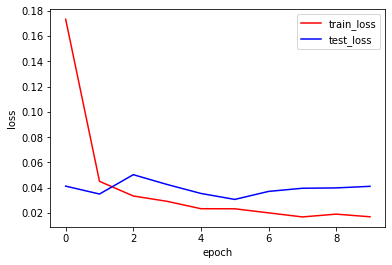

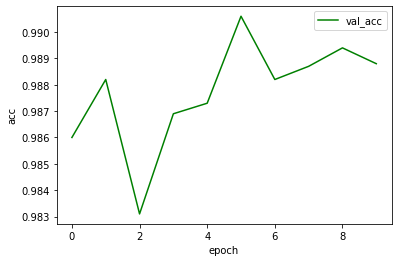

In [13]:
'''モデルの定義'''

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7 * 7 * 32, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)


'''最適化手法の定義'''
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


'''訓練用の関数を定義'''
def train(train_loader):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss = running_loss / len(train_loader)
    return train_loss


'''評価用の関数を定義'''
def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            predicted = outputs.max(1, keepdim=True)[1]
            labels = labels.view_as(predicted)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    return val_loss, val_acc

'''誤差(loss)を記録する空の配列を用意'''
loss_list = []
val_loss_list = []
val_acc_list = []


'''学習'''
train_loader, test_loader = MNIST_loaders(100,100)
for epoch in range(10):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)
    print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f' % (epoch, loss, val_loss, val_acc))
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)


'''学習の結果と使用したモデルを保存'''
np.save('loss_list.npy', np.array(loss_list))
np.save('val_loss_list.npy', np.array(val_loss_list))
np.save('val_acc_list.npy', np.array(val_acc_list))
torch.save(model.state_dict(), 'cnn.pkl')


'''結果の表示'''
plt.plot(range(10), loss_list, 'r-', label='train_loss')
plt.plot(range(10), val_loss_list, 'b-', label='test_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.figure()
plt.plot(range(10), val_acc_list, 'g-', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
print('正解率：',val_acc_list[-1]*100, '%')

## forward_forwardの実装

In [20]:
# data_loder

def MNIST_loaders(train_batch_size=50000, test_batch_size=10000):

    transform = Compose([
        ToTensor(),
        Normalize((0.1307,), (0.3081,)),
        Lambda(lambda x: torch.flatten(x))])

    train_loader = DataLoader(
        MNIST('./data/', train=True,
              download=True,
              transform=transform),
        batch_size=train_batch_size, shuffle=True)

    test_loader = DataLoader(
        MNIST('./data/', train=False,
              download=True,
              transform=transform),
        batch_size=test_batch_size, shuffle=False)

    return train_loader, test_loader

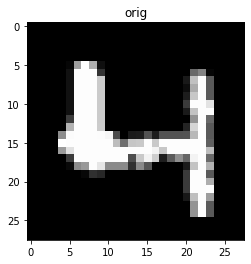

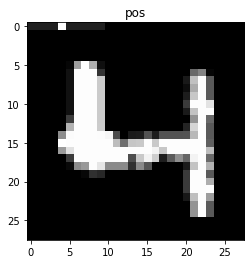

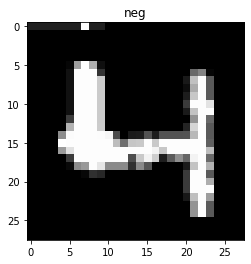

training layer 0 ...


  0%|          | 2/1000 [00:00<01:00, 16.43it/s]

epoch 0, loss: 1.1268
epoch 1, loss: 1.0779
epoch 2, loss: 0.9672


  1%|          | 6/1000 [00:00<01:00, 16.54it/s]

epoch 3, loss: 0.8083
epoch 4, loss: 0.7206
epoch 5, loss: 0.8340
epoch 6, loss: 0.8320


  1%|          | 10/1000 [00:00<00:58, 16.82it/s]

epoch 7, loss: 0.7539
epoch 8, loss: 0.7118
epoch 9, loss: 0.7258
epoch 10, loss: 0.7545


  1%|▏         | 14/1000 [00:00<00:57, 17.03it/s]

epoch 11, loss: 0.7680
epoch 12, loss: 0.7605
epoch 13, loss: 0.7383
epoch 14, loss: 0.7139


  2%|▏         | 18/1000 [00:01<00:58, 16.81it/s]

epoch 15, loss: 0.7030
epoch 16, loss: 0.7129
epoch 17, loss: 0.7294
epoch 18, loss: 0.7315


  2%|▏         | 22/1000 [00:01<00:59, 16.58it/s]

epoch 19, loss: 0.7178
epoch 20, loss: 0.7036
epoch 21, loss: 0.7005
epoch 22, loss: 0.7067


  3%|▎         | 26/1000 [00:01<00:58, 16.63it/s]

epoch 23, loss: 0.7138
epoch 24, loss: 0.7155
epoch 25, loss: 0.7108
epoch 26, loss: 0.7032


  3%|▎         | 30/1000 [00:01<00:58, 16.68it/s]

epoch 27, loss: 0.6982
epoch 28, loss: 0.6990
epoch 29, loss: 0.7036
epoch 30, loss: 0.7060


  3%|▎         | 34/1000 [00:02<00:57, 16.78it/s]

epoch 31, loss: 0.7033
epoch 32, loss: 0.6985
epoch 33, loss: 0.6961
epoch 34, loss: 0.6973


  4%|▍         | 38/1000 [00:02<00:57, 16.69it/s]

epoch 35, loss: 0.6997
epoch 36, loss: 0.7006
epoch 37, loss: 0.6991
epoch 38, loss: 0.6966


  4%|▍         | 42/1000 [00:02<00:57, 16.62it/s]

epoch 39, loss: 0.6952
epoch 40, loss: 0.6958
epoch 41, loss: 0.6972
epoch 42, loss: 0.6974


  5%|▍         | 46/1000 [00:02<00:57, 16.71it/s]

epoch 43, loss: 0.6961
epoch 44, loss: 0.6947
epoch 45, loss: 0.6944
epoch 46, loss: 0.6951


  5%|▌         | 50/1000 [00:02<00:56, 16.73it/s]

epoch 47, loss: 0.6956
epoch 48, loss: 0.6953
epoch 49, loss: 0.6943
epoch 50, loss: 0.6936


  5%|▌         | 54/1000 [00:03<00:56, 16.80it/s]

epoch 51, loss: 0.6937
epoch 52, loss: 0.6941
epoch 53, loss: 0.6941
epoch 54, loss: 0.6936


  6%|▌         | 58/1000 [00:03<00:56, 16.63it/s]

epoch 55, loss: 0.6930
epoch 56, loss: 0.6929
epoch 57, loss: 0.6931
epoch 58, loss: 0.6931


  6%|▌         | 62/1000 [00:03<00:56, 16.59it/s]

epoch 59, loss: 0.6928
epoch 60, loss: 0.6924
epoch 61, loss: 0.6921
epoch 62, loss: 0.6921


  7%|▋         | 66/1000 [00:03<00:56, 16.65it/s]

epoch 63, loss: 0.6921
epoch 64, loss: 0.6919
epoch 65, loss: 0.6916
epoch 66, loss: 0.6913


  7%|▋         | 70/1000 [00:04<00:56, 16.32it/s]

epoch 67, loss: 0.6912
epoch 68, loss: 0.6911
epoch 69, loss: 0.6909
epoch 70, loss: 0.6906


  7%|▋         | 74/1000 [00:04<00:56, 16.43it/s]

epoch 71, loss: 0.6904
epoch 72, loss: 0.6902
epoch 73, loss: 0.6901
epoch 74, loss: 0.6898


  8%|▊         | 78/1000 [00:04<00:56, 16.34it/s]

epoch 75, loss: 0.6895
epoch 76, loss: 0.6893
epoch 77, loss: 0.6890
epoch 78, loss: 0.6888


  8%|▊         | 82/1000 [00:04<00:55, 16.47it/s]

epoch 79, loss: 0.6885
epoch 80, loss: 0.6882
epoch 81, loss: 0.6879
epoch 82, loss: 0.6877


  9%|▊         | 86/1000 [00:05<00:55, 16.51it/s]

epoch 83, loss: 0.6874
epoch 84, loss: 0.6871
epoch 85, loss: 0.6867
epoch 86, loss: 0.6864


  9%|▉         | 90/1000 [00:05<00:55, 16.35it/s]

epoch 87, loss: 0.6860
epoch 88, loss: 0.6857
epoch 89, loss: 0.6853
epoch 90, loss: 0.6849


  9%|▉         | 94/1000 [00:05<00:54, 16.51it/s]

epoch 91, loss: 0.6845
epoch 92, loss: 0.6841
epoch 93, loss: 0.6837
epoch 94, loss: 0.6833


 10%|▉         | 98/1000 [00:05<00:54, 16.62it/s]

epoch 95, loss: 0.6828
epoch 96, loss: 0.6824
epoch 97, loss: 0.6819
epoch 98, loss: 0.6814


 10%|█         | 102/1000 [00:06<00:53, 16.73it/s]

epoch 99, loss: 0.6809
epoch 100, loss: 0.6804
epoch 101, loss: 0.6799
epoch 102, loss: 0.6794


 11%|█         | 106/1000 [00:06<00:53, 16.60it/s]

epoch 103, loss: 0.6788
epoch 104, loss: 0.6783
epoch 105, loss: 0.6777
epoch 106, loss: 0.6771


 11%|█         | 110/1000 [00:06<00:53, 16.49it/s]

epoch 107, loss: 0.6765
epoch 108, loss: 0.6759
epoch 109, loss: 0.6753
epoch 110, loss: 0.6747


 11%|█▏        | 114/1000 [00:06<00:53, 16.47it/s]

epoch 111, loss: 0.6740
epoch 112, loss: 0.6733
epoch 113, loss: 0.6727
epoch 114, loss: 0.6720


 12%|█▏        | 118/1000 [00:07<00:53, 16.46it/s]

epoch 115, loss: 0.6713
epoch 116, loss: 0.6706
epoch 117, loss: 0.6698
epoch 118, loss: 0.6691


 12%|█▏        | 122/1000 [00:07<00:53, 16.39it/s]

epoch 119, loss: 0.6684
epoch 120, loss: 0.6676
epoch 121, loss: 0.6668
epoch 122, loss: 0.6660


 13%|█▎        | 126/1000 [00:07<00:53, 16.38it/s]

epoch 123, loss: 0.6652
epoch 124, loss: 0.6644
epoch 125, loss: 0.6636
epoch 126, loss: 0.6628


 13%|█▎        | 130/1000 [00:07<00:52, 16.43it/s]

epoch 127, loss: 0.6619
epoch 128, loss: 0.6611
epoch 129, loss: 0.6602
epoch 130, loss: 0.6594


 13%|█▎        | 134/1000 [00:08<00:52, 16.50it/s]

epoch 131, loss: 0.6585
epoch 132, loss: 0.6576
epoch 133, loss: 0.6567
epoch 134, loss: 0.6558


 14%|█▍        | 138/1000 [00:08<00:52, 16.39it/s]

epoch 135, loss: 0.6549
epoch 136, loss: 0.6540
epoch 137, loss: 0.6531
epoch 138, loss: 0.6521


 14%|█▍        | 142/1000 [00:08<00:52, 16.36it/s]

epoch 139, loss: 0.6512
epoch 140, loss: 0.6503
epoch 141, loss: 0.6493
epoch 142, loss: 0.6484


 15%|█▍        | 146/1000 [00:08<00:52, 16.41it/s]

epoch 143, loss: 0.6474
epoch 144, loss: 0.6465
epoch 145, loss: 0.6455
epoch 146, loss: 0.6445


 15%|█▌        | 150/1000 [00:09<00:51, 16.44it/s]

epoch 147, loss: 0.6436
epoch 148, loss: 0.6426
epoch 149, loss: 0.6416
epoch 150, loss: 0.6407


 15%|█▌        | 154/1000 [00:09<00:51, 16.44it/s]

epoch 151, loss: 0.6397
epoch 152, loss: 0.6387
epoch 153, loss: 0.6378
epoch 154, loss: 0.6368


 16%|█▌        | 158/1000 [00:09<00:51, 16.36it/s]

epoch 155, loss: 0.6358
epoch 156, loss: 0.6349
epoch 157, loss: 0.6339
epoch 158, loss: 0.6329


 16%|█▌        | 162/1000 [00:09<00:51, 16.42it/s]

epoch 159, loss: 0.6320
epoch 160, loss: 0.6310
epoch 161, loss: 0.6301
epoch 162, loss: 0.6291


 17%|█▋        | 166/1000 [00:10<00:50, 16.44it/s]

epoch 163, loss: 0.6281
epoch 164, loss: 0.6272
epoch 165, loss: 0.6262
epoch 166, loss: 0.6253


 17%|█▋        | 170/1000 [00:10<00:50, 16.46it/s]

epoch 167, loss: 0.6243
epoch 168, loss: 0.6234
epoch 169, loss: 0.6225
epoch 170, loss: 0.6215


 17%|█▋        | 174/1000 [00:10<00:50, 16.39it/s]

epoch 171, loss: 0.6206
epoch 172, loss: 0.6196
epoch 173, loss: 0.6187
epoch 174, loss: 0.6178


 18%|█▊        | 178/1000 [00:10<00:50, 16.34it/s]

epoch 175, loss: 0.6169
epoch 176, loss: 0.6159
epoch 177, loss: 0.6150
epoch 178, loss: 0.6141


 18%|█▊        | 182/1000 [00:11<00:49, 16.47it/s]

epoch 179, loss: 0.6132
epoch 180, loss: 0.6123
epoch 181, loss: 0.6114
epoch 182, loss: 0.6105


 19%|█▊        | 186/1000 [00:11<00:49, 16.46it/s]

epoch 183, loss: 0.6096
epoch 184, loss: 0.6087
epoch 185, loss: 0.6078
epoch 186, loss: 0.6069


 19%|█▉        | 190/1000 [00:11<00:49, 16.45it/s]

epoch 187, loss: 0.6060
epoch 188, loss: 0.6051
epoch 189, loss: 0.6042
epoch 190, loss: 0.6033


 19%|█▉        | 194/1000 [00:11<00:49, 16.42it/s]

epoch 191, loss: 0.6025
epoch 192, loss: 0.6016
epoch 193, loss: 0.6007
epoch 194, loss: 0.5998


 20%|█▉        | 198/1000 [00:11<00:48, 16.43it/s]

epoch 195, loss: 0.5990
epoch 196, loss: 0.5981
epoch 197, loss: 0.5973
epoch 198, loss: 0.5964


 20%|██        | 202/1000 [00:12<00:48, 16.49it/s]

epoch 199, loss: 0.5955
epoch 200, loss: 0.5947
epoch 201, loss: 0.5938
epoch 202, loss: 0.5930


 21%|██        | 206/1000 [00:12<00:48, 16.49it/s]

epoch 203, loss: 0.5922
epoch 204, loss: 0.5913
epoch 205, loss: 0.5905
epoch 206, loss: 0.5897


 21%|██        | 210/1000 [00:12<00:48, 16.39it/s]

epoch 207, loss: 0.5888
epoch 208, loss: 0.5880
epoch 209, loss: 0.5872
epoch 210, loss: 0.5864


 21%|██▏       | 214/1000 [00:12<00:47, 16.39it/s]

epoch 211, loss: 0.5855
epoch 212, loss: 0.5847
epoch 213, loss: 0.5839
epoch 214, loss: 0.5831


 22%|██▏       | 218/1000 [00:13<00:47, 16.44it/s]

epoch 215, loss: 0.5823
epoch 216, loss: 0.5815
epoch 217, loss: 0.5807
epoch 218, loss: 0.5799


 22%|██▏       | 222/1000 [00:13<00:47, 16.45it/s]

epoch 219, loss: 0.5791
epoch 220, loss: 0.5783
epoch 221, loss: 0.5775
epoch 222, loss: 0.5767


 23%|██▎       | 226/1000 [00:13<00:47, 16.42it/s]

epoch 223, loss: 0.5759
epoch 224, loss: 0.5752
epoch 225, loss: 0.5744
epoch 226, loss: 0.5736


 23%|██▎       | 230/1000 [00:13<00:46, 16.44it/s]

epoch 227, loss: 0.5728
epoch 228, loss: 0.5721
epoch 229, loss: 0.5713
epoch 230, loss: 0.5705


 23%|██▎       | 234/1000 [00:14<00:46, 16.46it/s]

epoch 231, loss: 0.5698
epoch 232, loss: 0.5690
epoch 233, loss: 0.5683
epoch 234, loss: 0.5675


 24%|██▍       | 238/1000 [00:14<00:46, 16.46it/s]

epoch 235, loss: 0.5668
epoch 236, loss: 0.5660
epoch 237, loss: 0.5653
epoch 238, loss: 0.5645


 24%|██▍       | 242/1000 [00:14<00:46, 16.43it/s]

epoch 239, loss: 0.5638
epoch 240, loss: 0.5631
epoch 241, loss: 0.5623
epoch 242, loss: 0.5616


 25%|██▍       | 246/1000 [00:14<00:45, 16.40it/s]

epoch 243, loss: 0.5609
epoch 244, loss: 0.5602
epoch 245, loss: 0.5594
epoch 246, loss: 0.5587


 25%|██▌       | 250/1000 [00:15<00:45, 16.44it/s]

epoch 247, loss: 0.5580
epoch 248, loss: 0.5573
epoch 249, loss: 0.5566
epoch 250, loss: 0.5559


 25%|██▌       | 254/1000 [00:15<00:45, 16.48it/s]

epoch 251, loss: 0.5552
epoch 252, loss: 0.5545
epoch 253, loss: 0.5538
epoch 254, loss: 0.5531


 26%|██▌       | 258/1000 [00:15<00:45, 16.48it/s]

epoch 255, loss: 0.5524
epoch 256, loss: 0.5517
epoch 257, loss: 0.5510
epoch 258, loss: 0.5503


 26%|██▌       | 262/1000 [00:15<00:45, 16.40it/s]

epoch 259, loss: 0.5497
epoch 260, loss: 0.5490
epoch 261, loss: 0.5483
epoch 262, loss: 0.5476


 27%|██▋       | 266/1000 [00:16<00:44, 16.42it/s]

epoch 263, loss: 0.5470
epoch 264, loss: 0.5463
epoch 265, loss: 0.5456
epoch 266, loss: 0.5450


 27%|██▋       | 270/1000 [00:16<00:44, 16.47it/s]

epoch 267, loss: 0.5443
epoch 268, loss: 0.5437
epoch 269, loss: 0.5430
epoch 270, loss: 0.5424


 27%|██▋       | 274/1000 [00:16<00:43, 16.51it/s]

epoch 271, loss: 0.5417
epoch 272, loss: 0.5411
epoch 273, loss: 0.5404
epoch 274, loss: 0.5398


 28%|██▊       | 278/1000 [00:16<00:43, 16.45it/s]

epoch 275, loss: 0.5392
epoch 276, loss: 0.5385
epoch 277, loss: 0.5379
epoch 278, loss: 0.5373


 28%|██▊       | 282/1000 [00:17<00:43, 16.45it/s]

epoch 279, loss: 0.5366
epoch 280, loss: 0.5360
epoch 281, loss: 0.5354
epoch 282, loss: 0.5348


 29%|██▊       | 286/1000 [00:17<00:43, 16.43it/s]

epoch 283, loss: 0.5342
epoch 284, loss: 0.5335
epoch 285, loss: 0.5329
epoch 286, loss: 0.5323


 29%|██▉       | 290/1000 [00:17<00:43, 16.46it/s]

epoch 287, loss: 0.5317
epoch 288, loss: 0.5311
epoch 289, loss: 0.5305
epoch 290, loss: 0.5299


 29%|██▉       | 294/1000 [00:17<00:42, 16.49it/s]

epoch 291, loss: 0.5293
epoch 292, loss: 0.5287
epoch 293, loss: 0.5281
epoch 294, loss: 0.5275


 30%|██▉       | 298/1000 [00:18<00:42, 16.45it/s]

epoch 295, loss: 0.5270
epoch 296, loss: 0.5264
epoch 297, loss: 0.5258
epoch 298, loss: 0.5252


 30%|███       | 302/1000 [00:18<00:42, 16.35it/s]

epoch 299, loss: 0.5246
epoch 300, loss: 0.5241
epoch 301, loss: 0.5235
epoch 302, loss: 0.5229


 31%|███       | 306/1000 [00:18<00:42, 16.20it/s]

epoch 303, loss: 0.5224
epoch 304, loss: 0.5218
epoch 305, loss: 0.5212
epoch 306, loss: 0.5207


 31%|███       | 310/1000 [00:18<00:42, 16.38it/s]

epoch 307, loss: 0.5201
epoch 308, loss: 0.5196
epoch 309, loss: 0.5190
epoch 310, loss: 0.5185


 31%|███▏      | 314/1000 [00:19<00:41, 16.41it/s]

epoch 311, loss: 0.5179
epoch 312, loss: 0.5174
epoch 313, loss: 0.5168
epoch 314, loss: 0.5163


 32%|███▏      | 318/1000 [00:19<00:41, 16.50it/s]

epoch 315, loss: 0.5157
epoch 316, loss: 0.5152
epoch 317, loss: 0.5147
epoch 318, loss: 0.5141


 32%|███▏      | 322/1000 [00:19<00:41, 16.46it/s]

epoch 319, loss: 0.5136
epoch 320, loss: 0.5131
epoch 321, loss: 0.5125
epoch 322, loss: 0.5120


 33%|███▎      | 326/1000 [00:19<00:40, 16.44it/s]

epoch 323, loss: 0.5115
epoch 324, loss: 0.5110
epoch 325, loss: 0.5105
epoch 326, loss: 0.5099


 33%|███▎      | 330/1000 [00:20<00:40, 16.47it/s]

epoch 327, loss: 0.5094
epoch 328, loss: 0.5089
epoch 329, loss: 0.5084
epoch 330, loss: 0.5079


 33%|███▎      | 334/1000 [00:20<00:40, 16.39it/s]

epoch 331, loss: 0.5074
epoch 332, loss: 0.5069
epoch 333, loss: 0.5064
epoch 334, loss: 0.5059


 34%|███▍      | 338/1000 [00:20<00:40, 16.29it/s]

epoch 335, loss: 0.5054
epoch 336, loss: 0.5049
epoch 337, loss: 0.5044
epoch 338, loss: 0.5039


 34%|███▍      | 342/1000 [00:20<00:40, 16.34it/s]

epoch 339, loss: 0.5034
epoch 340, loss: 0.5029
epoch 341, loss: 0.5025
epoch 342, loss: 0.5020


 35%|███▍      | 346/1000 [00:20<00:39, 16.46it/s]

epoch 343, loss: 0.5015
epoch 344, loss: 0.5010
epoch 345, loss: 0.5005
epoch 346, loss: 0.5001


 35%|███▌      | 350/1000 [00:21<00:39, 16.44it/s]

epoch 347, loss: 0.4996
epoch 348, loss: 0.4991
epoch 349, loss: 0.4986
epoch 350, loss: 0.4982


 35%|███▌      | 354/1000 [00:21<00:39, 16.44it/s]

epoch 351, loss: 0.4977
epoch 352, loss: 0.4973
epoch 353, loss: 0.4968
epoch 354, loss: 0.4963


 36%|███▌      | 358/1000 [00:21<00:38, 16.48it/s]

epoch 355, loss: 0.4959
epoch 356, loss: 0.4954
epoch 357, loss: 0.4950
epoch 358, loss: 0.4945


 36%|███▌      | 362/1000 [00:21<00:38, 16.46it/s]

epoch 359, loss: 0.4941
epoch 360, loss: 0.4936
epoch 361, loss: 0.4932
epoch 362, loss: 0.4927


 37%|███▋      | 366/1000 [00:22<00:38, 16.44it/s]

epoch 363, loss: 0.4923
epoch 364, loss: 0.4918
epoch 365, loss: 0.4914
epoch 366, loss: 0.4910


 37%|███▋      | 370/1000 [00:22<00:38, 16.46it/s]

epoch 367, loss: 0.4905
epoch 368, loss: 0.4901
epoch 369, loss: 0.4897
epoch 370, loss: 0.4892


 37%|███▋      | 374/1000 [00:22<00:38, 16.45it/s]

epoch 371, loss: 0.4888
epoch 372, loss: 0.4884
epoch 373, loss: 0.4879
epoch 374, loss: 0.4875


 38%|███▊      | 378/1000 [00:22<00:37, 16.41it/s]

epoch 375, loss: 0.4871
epoch 376, loss: 0.4867
epoch 377, loss: 0.4862
epoch 378, loss: 0.4858


 38%|███▊      | 382/1000 [00:23<00:37, 16.43it/s]

epoch 379, loss: 0.4854
epoch 380, loss: 0.4850
epoch 381, loss: 0.4846
epoch 382, loss: 0.4842


 39%|███▊      | 386/1000 [00:23<00:37, 16.47it/s]

epoch 383, loss: 0.4838
epoch 384, loss: 0.4834
epoch 385, loss: 0.4830
epoch 386, loss: 0.4825


 39%|███▉      | 390/1000 [00:23<00:37, 16.46it/s]

epoch 387, loss: 0.4821
epoch 388, loss: 0.4817
epoch 389, loss: 0.4813
epoch 390, loss: 0.4809


 39%|███▉      | 394/1000 [00:23<00:36, 16.43it/s]

epoch 391, loss: 0.4805
epoch 392, loss: 0.4802
epoch 393, loss: 0.4798
epoch 394, loss: 0.4794


 40%|███▉      | 398/1000 [00:24<00:36, 16.46it/s]

epoch 395, loss: 0.4790
epoch 396, loss: 0.4786
epoch 397, loss: 0.4782
epoch 398, loss: 0.4778


 40%|████      | 402/1000 [00:24<00:36, 16.45it/s]

epoch 399, loss: 0.4774
epoch 400, loss: 0.4770
epoch 401, loss: 0.4767
epoch 402, loss: 0.4763


 41%|████      | 406/1000 [00:24<00:36, 16.44it/s]

epoch 403, loss: 0.4759
epoch 404, loss: 0.4755
epoch 405, loss: 0.4752
epoch 406, loss: 0.4748


 41%|████      | 410/1000 [00:24<00:35, 16.44it/s]

epoch 407, loss: 0.4744
epoch 408, loss: 0.4740
epoch 409, loss: 0.4737
epoch 410, loss: 0.4733


 41%|████▏     | 414/1000 [00:25<00:35, 16.43it/s]

epoch 411, loss: 0.4729
epoch 412, loss: 0.4726
epoch 413, loss: 0.4722
epoch 414, loss: 0.4718


 42%|████▏     | 418/1000 [00:25<00:35, 16.45it/s]

epoch 415, loss: 0.4715
epoch 416, loss: 0.4711
epoch 417, loss: 0.4707
epoch 418, loss: 0.4704


 42%|████▏     | 422/1000 [00:25<00:35, 16.45it/s]

epoch 419, loss: 0.4700
epoch 420, loss: 0.4697
epoch 421, loss: 0.4693
epoch 422, loss: 0.4690


 43%|████▎     | 426/1000 [00:25<00:34, 16.43it/s]

epoch 423, loss: 0.4686
epoch 424, loss: 0.4683
epoch 425, loss: 0.4679
epoch 426, loss: 0.4676


 43%|████▎     | 430/1000 [00:26<00:34, 16.43it/s]

epoch 427, loss: 0.4672
epoch 428, loss: 0.4669
epoch 429, loss: 0.4665
epoch 430, loss: 0.4662


 43%|████▎     | 434/1000 [00:26<00:34, 16.45it/s]

epoch 431, loss: 0.4659
epoch 432, loss: 0.4655
epoch 433, loss: 0.4652
epoch 434, loss: 0.4648


 44%|████▍     | 438/1000 [00:26<00:34, 16.45it/s]

epoch 435, loss: 0.4645
epoch 436, loss: 0.4642
epoch 437, loss: 0.4638
epoch 438, loss: 0.4635


 44%|████▍     | 442/1000 [00:26<00:33, 16.45it/s]

epoch 439, loss: 0.4632
epoch 440, loss: 0.4628
epoch 441, loss: 0.4625
epoch 442, loss: 0.4622


 45%|████▍     | 446/1000 [00:27<00:33, 16.45it/s]

epoch 443, loss: 0.4618
epoch 444, loss: 0.4615
epoch 445, loss: 0.4612
epoch 446, loss: 0.4609


 45%|████▌     | 450/1000 [00:27<00:33, 16.44it/s]

epoch 447, loss: 0.4605
epoch 448, loss: 0.4602
epoch 449, loss: 0.4599
epoch 450, loss: 0.4596


 45%|████▌     | 454/1000 [00:27<00:33, 16.45it/s]

epoch 451, loss: 0.4593
epoch 452, loss: 0.4590
epoch 453, loss: 0.4586
epoch 454, loss: 0.4583


 46%|████▌     | 458/1000 [00:27<00:32, 16.44it/s]

epoch 455, loss: 0.4580
epoch 456, loss: 0.4577
epoch 457, loss: 0.4574
epoch 458, loss: 0.4571


 46%|████▌     | 462/1000 [00:28<00:32, 16.44it/s]

epoch 459, loss: 0.4568
epoch 460, loss: 0.4565
epoch 461, loss: 0.4561
epoch 462, loss: 0.4558


 47%|████▋     | 466/1000 [00:28<00:32, 16.44it/s]

epoch 463, loss: 0.4555
epoch 464, loss: 0.4552
epoch 465, loss: 0.4549
epoch 466, loss: 0.4546


 47%|████▋     | 470/1000 [00:28<00:32, 16.45it/s]

epoch 467, loss: 0.4543
epoch 468, loss: 0.4540
epoch 469, loss: 0.4537
epoch 470, loss: 0.4534


 47%|████▋     | 474/1000 [00:28<00:31, 16.45it/s]

epoch 471, loss: 0.4531
epoch 472, loss: 0.4528
epoch 473, loss: 0.4525
epoch 474, loss: 0.4522


 48%|████▊     | 478/1000 [00:29<00:31, 16.48it/s]

epoch 475, loss: 0.4519
epoch 476, loss: 0.4517
epoch 477, loss: 0.4514
epoch 478, loss: 0.4511


 48%|████▊     | 482/1000 [00:29<00:31, 16.43it/s]

epoch 479, loss: 0.4508
epoch 480, loss: 0.4505
epoch 481, loss: 0.4502
epoch 482, loss: 0.4499


 49%|████▊     | 486/1000 [00:29<00:31, 16.17it/s]

epoch 483, loss: 0.4496
epoch 484, loss: 0.4493
epoch 485, loss: 0.4491
epoch 486, loss: 0.4488


 49%|████▉     | 490/1000 [00:29<00:31, 16.42it/s]

epoch 487, loss: 0.4485
epoch 488, loss: 0.4482
epoch 489, loss: 0.4479
epoch 490, loss: 0.4476


 49%|████▉     | 494/1000 [00:30<00:30, 16.53it/s]

epoch 491, loss: 0.4474
epoch 492, loss: 0.4471
epoch 493, loss: 0.4468
epoch 494, loss: 0.4465


 50%|████▉     | 498/1000 [00:30<00:30, 16.51it/s]

epoch 495, loss: 0.4463
epoch 496, loss: 0.4460
epoch 497, loss: 0.4457
epoch 498, loss: 0.4454


 50%|█████     | 502/1000 [00:30<00:30, 16.45it/s]

epoch 499, loss: 0.4452
epoch 500, loss: 0.4449
epoch 501, loss: 0.4446
epoch 502, loss: 0.4444


 51%|█████     | 506/1000 [00:30<00:29, 16.51it/s]

epoch 503, loss: 0.4441
epoch 504, loss: 0.4438
epoch 505, loss: 0.4435
epoch 506, loss: 0.4433


 51%|█████     | 510/1000 [00:30<00:29, 16.45it/s]

epoch 507, loss: 0.4430
epoch 508, loss: 0.4428
epoch 509, loss: 0.4425
epoch 510, loss: 0.4422


 51%|█████▏    | 514/1000 [00:31<00:29, 16.47it/s]

epoch 511, loss: 0.4420
epoch 512, loss: 0.4417
epoch 513, loss: 0.4414
epoch 514, loss: 0.4412


 52%|█████▏    | 518/1000 [00:31<00:29, 16.44it/s]

epoch 515, loss: 0.4409
epoch 516, loss: 0.4407
epoch 517, loss: 0.4404
epoch 518, loss: 0.4401


 52%|█████▏    | 522/1000 [00:31<00:28, 16.50it/s]

epoch 519, loss: 0.4399
epoch 520, loss: 0.4396
epoch 521, loss: 0.4394
epoch 522, loss: 0.4391


 53%|█████▎    | 526/1000 [00:31<00:28, 16.45it/s]

epoch 523, loss: 0.4389
epoch 524, loss: 0.4386
epoch 525, loss: 0.4384
epoch 526, loss: 0.4381


 53%|█████▎    | 530/1000 [00:32<00:28, 16.50it/s]

epoch 527, loss: 0.4379
epoch 528, loss: 0.4376
epoch 529, loss: 0.4374
epoch 530, loss: 0.4371


 53%|█████▎    | 534/1000 [00:32<00:29, 16.04it/s]

epoch 531, loss: 0.4369
epoch 532, loss: 0.4366
epoch 533, loss: 0.4364
epoch 534, loss: 0.4361


 54%|█████▍    | 538/1000 [00:32<00:29, 15.83it/s]

epoch 535, loss: 0.4359
epoch 536, loss: 0.4356
epoch 537, loss: 0.4354
epoch 538, loss: 0.4352


 54%|█████▍    | 542/1000 [00:32<00:28, 16.20it/s]

epoch 539, loss: 0.4349
epoch 540, loss: 0.4347
epoch 541, loss: 0.4344
epoch 542, loss: 0.4342


 55%|█████▍    | 546/1000 [00:33<00:27, 16.42it/s]

epoch 543, loss: 0.4339
epoch 544, loss: 0.4337
epoch 545, loss: 0.4335
epoch 546, loss: 0.4332


 55%|█████▌    | 550/1000 [00:33<00:27, 16.44it/s]

epoch 547, loss: 0.4330
epoch 548, loss: 0.4328
epoch 549, loss: 0.4325
epoch 550, loss: 0.4323


 55%|█████▌    | 554/1000 [00:33<00:27, 16.47it/s]

epoch 551, loss: 0.4321
epoch 552, loss: 0.4318
epoch 553, loss: 0.4316
epoch 554, loss: 0.4314


 56%|█████▌    | 558/1000 [00:33<00:26, 16.49it/s]

epoch 555, loss: 0.4311
epoch 556, loss: 0.4309
epoch 557, loss: 0.4307
epoch 558, loss: 0.4304


 56%|█████▌    | 562/1000 [00:34<00:26, 16.49it/s]

epoch 559, loss: 0.4302
epoch 560, loss: 0.4300
epoch 561, loss: 0.4297
epoch 562, loss: 0.4295


 57%|█████▋    | 566/1000 [00:34<00:26, 16.44it/s]

epoch 563, loss: 0.4293
epoch 564, loss: 0.4291
epoch 565, loss: 0.4288
epoch 566, loss: 0.4286


 57%|█████▋    | 570/1000 [00:34<00:26, 16.43it/s]

epoch 567, loss: 0.4284
epoch 568, loss: 0.4282
epoch 569, loss: 0.4279
epoch 570, loss: 0.4277


 57%|█████▋    | 574/1000 [00:34<00:25, 16.45it/s]

epoch 571, loss: 0.4275
epoch 572, loss: 0.4273
epoch 573, loss: 0.4271
epoch 574, loss: 0.4268


 58%|█████▊    | 578/1000 [00:35<00:25, 16.50it/s]

epoch 575, loss: 0.4266
epoch 576, loss: 0.4264
epoch 577, loss: 0.4262
epoch 578, loss: 0.4260


 58%|█████▊    | 582/1000 [00:35<00:25, 16.50it/s]

epoch 579, loss: 0.4257
epoch 580, loss: 0.4255
epoch 581, loss: 0.4253
epoch 582, loss: 0.4251


 59%|█████▊    | 586/1000 [00:35<00:25, 16.46it/s]

epoch 583, loss: 0.4249
epoch 584, loss: 0.4247
epoch 585, loss: 0.4244
epoch 586, loss: 0.4242


 59%|█████▉    | 590/1000 [00:35<00:24, 16.50it/s]

epoch 587, loss: 0.4240
epoch 588, loss: 0.4238
epoch 589, loss: 0.4236
epoch 590, loss: 0.4234


 59%|█████▉    | 594/1000 [00:36<00:24, 16.25it/s]

epoch 591, loss: 0.4232
epoch 592, loss: 0.4229
epoch 593, loss: 0.4227
epoch 594, loss: 0.4225


 60%|█████▉    | 598/1000 [00:36<00:24, 16.48it/s]

epoch 595, loss: 0.4223
epoch 596, loss: 0.4221
epoch 597, loss: 0.4219
epoch 598, loss: 0.4217


 60%|██████    | 602/1000 [00:36<00:24, 16.46it/s]

epoch 599, loss: 0.4215
epoch 600, loss: 0.4213
epoch 601, loss: 0.4211
epoch 602, loss: 0.4209


 61%|██████    | 606/1000 [00:36<00:24, 16.40it/s]

epoch 603, loss: 0.4206
epoch 604, loss: 0.4204
epoch 605, loss: 0.4202
epoch 606, loss: 0.4200


 61%|██████    | 610/1000 [00:37<00:23, 16.52it/s]

epoch 607, loss: 0.4198
epoch 608, loss: 0.4196
epoch 609, loss: 0.4194
epoch 610, loss: 0.4192


 61%|██████▏   | 614/1000 [00:37<00:23, 16.47it/s]

epoch 611, loss: 0.4190
epoch 612, loss: 0.4188
epoch 613, loss: 0.4186
epoch 614, loss: 0.4184


 62%|██████▏   | 618/1000 [00:37<00:23, 16.49it/s]

epoch 615, loss: 0.4182
epoch 616, loss: 0.4180
epoch 617, loss: 0.4178
epoch 618, loss: 0.4176


 62%|██████▏   | 622/1000 [00:37<00:22, 16.46it/s]

epoch 619, loss: 0.4174
epoch 620, loss: 0.4172
epoch 621, loss: 0.4170
epoch 622, loss: 0.4168


 63%|██████▎   | 626/1000 [00:38<00:22, 16.41it/s]

epoch 623, loss: 0.4166
epoch 624, loss: 0.4164
epoch 625, loss: 0.4162
epoch 626, loss: 0.4160


 63%|██████▎   | 630/1000 [00:38<00:23, 15.78it/s]

epoch 627, loss: 0.4158
epoch 628, loss: 0.4156
epoch 629, loss: 0.4154
epoch 630, loss: 0.4152


 63%|██████▎   | 634/1000 [00:38<00:22, 15.98it/s]

epoch 631, loss: 0.4151
epoch 632, loss: 0.4149
epoch 633, loss: 0.4147
epoch 634, loss: 0.4145


 64%|██████▍   | 638/1000 [00:38<00:22, 16.23it/s]

epoch 635, loss: 0.4143
epoch 636, loss: 0.4141
epoch 637, loss: 0.4139
epoch 638, loss: 0.4137


 64%|██████▍   | 642/1000 [00:39<00:21, 16.38it/s]

epoch 639, loss: 0.4135
epoch 640, loss: 0.4133
epoch 641, loss: 0.4131
epoch 642, loss: 0.4129


 65%|██████▍   | 646/1000 [00:39<00:21, 16.38it/s]

epoch 643, loss: 0.4128
epoch 644, loss: 0.4126
epoch 645, loss: 0.4124
epoch 646, loss: 0.4122


 65%|██████▌   | 650/1000 [00:39<00:21, 16.35it/s]

epoch 647, loss: 0.4120
epoch 648, loss: 0.4118
epoch 649, loss: 0.4116
epoch 650, loss: 0.4114


 65%|██████▌   | 654/1000 [00:39<00:21, 16.10it/s]

epoch 651, loss: 0.4113
epoch 652, loss: 0.4111
epoch 653, loss: 0.4109
epoch 654, loss: 0.4107


 66%|██████▌   | 658/1000 [00:40<00:21, 16.02it/s]

epoch 655, loss: 0.4105
epoch 656, loss: 0.4103
epoch 657, loss: 0.4101
epoch 658, loss: 0.4100


 66%|██████▌   | 662/1000 [00:40<00:20, 16.20it/s]

epoch 659, loss: 0.4098
epoch 660, loss: 0.4096
epoch 661, loss: 0.4094
epoch 662, loss: 0.4092


 67%|██████▋   | 666/1000 [00:40<00:20, 16.34it/s]

epoch 663, loss: 0.4091
epoch 664, loss: 0.4089
epoch 665, loss: 0.4087
epoch 666, loss: 0.4085


 67%|██████▋   | 670/1000 [00:40<00:20, 16.41it/s]

epoch 667, loss: 0.4083
epoch 668, loss: 0.4081
epoch 669, loss: 0.4080
epoch 670, loss: 0.4078


 67%|██████▋   | 674/1000 [00:41<00:19, 16.46it/s]

epoch 671, loss: 0.4076
epoch 672, loss: 0.4074
epoch 673, loss: 0.4073
epoch 674, loss: 0.4071


 68%|██████▊   | 678/1000 [00:41<00:19, 16.43it/s]

epoch 675, loss: 0.4069
epoch 676, loss: 0.4067
epoch 677, loss: 0.4065
epoch 678, loss: 0.4064


 68%|██████▊   | 682/1000 [00:41<00:19, 16.45it/s]

epoch 679, loss: 0.4062
epoch 680, loss: 0.4060
epoch 681, loss: 0.4058
epoch 682, loss: 0.4057


 69%|██████▊   | 686/1000 [00:41<00:19, 16.49it/s]

epoch 683, loss: 0.4055
epoch 684, loss: 0.4053
epoch 685, loss: 0.4052
epoch 686, loss: 0.4050


 69%|██████▉   | 690/1000 [00:41<00:18, 16.48it/s]

epoch 687, loss: 0.4048
epoch 688, loss: 0.4046
epoch 689, loss: 0.4045
epoch 690, loss: 0.4043


 69%|██████▉   | 694/1000 [00:42<00:18, 16.43it/s]

epoch 691, loss: 0.4041
epoch 692, loss: 0.4039
epoch 693, loss: 0.4038
epoch 694, loss: 0.4036


 70%|██████▉   | 698/1000 [00:42<00:18, 16.43it/s]

epoch 695, loss: 0.4034
epoch 696, loss: 0.4033
epoch 697, loss: 0.4031
epoch 698, loss: 0.4029


 70%|███████   | 702/1000 [00:42<00:18, 16.45it/s]

epoch 699, loss: 0.4028
epoch 700, loss: 0.4026
epoch 701, loss: 0.4024
epoch 702, loss: 0.4023


 71%|███████   | 706/1000 [00:42<00:17, 16.42it/s]

epoch 703, loss: 0.4021
epoch 704, loss: 0.4019
epoch 705, loss: 0.4018
epoch 706, loss: 0.4016


 71%|███████   | 710/1000 [00:43<00:17, 16.46it/s]

epoch 707, loss: 0.4014
epoch 708, loss: 0.4013
epoch 709, loss: 0.4011
epoch 710, loss: 0.4009


 71%|███████▏  | 714/1000 [00:43<00:17, 16.46it/s]

epoch 711, loss: 0.4008
epoch 712, loss: 0.4006
epoch 713, loss: 0.4004
epoch 714, loss: 0.4003


 72%|███████▏  | 718/1000 [00:43<00:17, 16.39it/s]

epoch 715, loss: 0.4001
epoch 716, loss: 0.3999
epoch 717, loss: 0.3998
epoch 718, loss: 0.3996


 72%|███████▏  | 722/1000 [00:43<00:17, 15.85it/s]

epoch 719, loss: 0.3995
epoch 720, loss: 0.3993
epoch 721, loss: 0.3991
epoch 722, loss: 0.3990


 73%|███████▎  | 726/1000 [00:44<00:16, 16.12it/s]

epoch 723, loss: 0.3988
epoch 724, loss: 0.3986
epoch 725, loss: 0.3985
epoch 726, loss: 0.3983


 73%|███████▎  | 730/1000 [00:44<00:16, 16.25it/s]

epoch 727, loss: 0.3982
epoch 728, loss: 0.3980
epoch 729, loss: 0.3978
epoch 730, loss: 0.3977


 73%|███████▎  | 734/1000 [00:44<00:16, 16.38it/s]

epoch 731, loss: 0.3975
epoch 732, loss: 0.3974
epoch 733, loss: 0.3972
epoch 734, loss: 0.3971


 74%|███████▍  | 738/1000 [00:44<00:16, 16.34it/s]

epoch 735, loss: 0.3969
epoch 736, loss: 0.3967
epoch 737, loss: 0.3966
epoch 738, loss: 0.3964


 74%|███████▍  | 742/1000 [00:45<00:15, 16.27it/s]

epoch 739, loss: 0.3963
epoch 740, loss: 0.3961
epoch 741, loss: 0.3960
epoch 742, loss: 0.3958


 75%|███████▍  | 746/1000 [00:45<00:15, 15.95it/s]

epoch 743, loss: 0.3957
epoch 744, loss: 0.3955
epoch 745, loss: 0.3953
epoch 746, loss: 0.3952


 75%|███████▌  | 750/1000 [00:45<00:15, 16.20it/s]

epoch 747, loss: 0.3950
epoch 748, loss: 0.3949
epoch 749, loss: 0.3947
epoch 750, loss: 0.3946


 75%|███████▌  | 754/1000 [00:45<00:15, 16.26it/s]

epoch 751, loss: 0.3944
epoch 752, loss: 0.3943
epoch 753, loss: 0.3941
epoch 754, loss: 0.3940


 76%|███████▌  | 758/1000 [00:46<00:14, 16.33it/s]

epoch 755, loss: 0.3938
epoch 756, loss: 0.3937
epoch 757, loss: 0.3935
epoch 758, loss: 0.3934


 76%|███████▌  | 762/1000 [00:46<00:15, 15.77it/s]

epoch 759, loss: 0.3932
epoch 760, loss: 0.3931
epoch 761, loss: 0.3929
epoch 762, loss: 0.3928


 77%|███████▋  | 766/1000 [00:46<00:14, 16.08it/s]

epoch 763, loss: 0.3926
epoch 764, loss: 0.3925
epoch 765, loss: 0.3923
epoch 766, loss: 0.3922


 77%|███████▋  | 770/1000 [00:46<00:14, 16.01it/s]

epoch 767, loss: 0.3920
epoch 768, loss: 0.3919
epoch 769, loss: 0.3917
epoch 770, loss: 0.3916


 77%|███████▋  | 774/1000 [00:47<00:14, 15.91it/s]

epoch 771, loss: 0.3914
epoch 772, loss: 0.3913
epoch 773, loss: 0.3911
epoch 774, loss: 0.3910


 78%|███████▊  | 778/1000 [00:47<00:13, 16.10it/s]

epoch 775, loss: 0.3908
epoch 776, loss: 0.3907
epoch 777, loss: 0.3906
epoch 778, loss: 0.3904


 78%|███████▊  | 782/1000 [00:47<00:13, 16.01it/s]

epoch 779, loss: 0.3903
epoch 780, loss: 0.3901
epoch 781, loss: 0.3900
epoch 782, loss: 0.3898


 79%|███████▊  | 786/1000 [00:47<00:13, 15.90it/s]

epoch 783, loss: 0.3897
epoch 784, loss: 0.3895
epoch 785, loss: 0.3894
epoch 786, loss: 0.3893


 79%|███████▉  | 790/1000 [00:48<00:12, 16.22it/s]

epoch 787, loss: 0.3891
epoch 788, loss: 0.3890
epoch 789, loss: 0.3888
epoch 790, loss: 0.3887


 79%|███████▉  | 794/1000 [00:48<00:12, 16.12it/s]

epoch 791, loss: 0.3886
epoch 792, loss: 0.3884
epoch 793, loss: 0.3883
epoch 794, loss: 0.3881


 80%|███████▉  | 798/1000 [00:48<00:12, 15.82it/s]

epoch 795, loss: 0.3880
epoch 796, loss: 0.3878
epoch 797, loss: 0.3877
epoch 798, loss: 0.3876


 80%|████████  | 802/1000 [00:48<00:12, 15.95it/s]

epoch 799, loss: 0.3874
epoch 800, loss: 0.3873
epoch 801, loss: 0.3871
epoch 802, loss: 0.3870


 81%|████████  | 806/1000 [00:49<00:12, 15.75it/s]

epoch 803, loss: 0.3869
epoch 804, loss: 0.3867
epoch 805, loss: 0.3866
epoch 806, loss: 0.3865


 81%|████████  | 810/1000 [00:49<00:11, 16.07it/s]

epoch 807, loss: 0.3863
epoch 808, loss: 0.3862
epoch 809, loss: 0.3860
epoch 810, loss: 0.3859


 81%|████████▏ | 814/1000 [00:49<00:11, 15.69it/s]

epoch 811, loss: 0.3858
epoch 812, loss: 0.3856
epoch 813, loss: 0.3855
epoch 814, loss: 0.3854


 82%|████████▏ | 818/1000 [00:49<00:11, 15.91it/s]

epoch 815, loss: 0.3852
epoch 816, loss: 0.3851
epoch 817, loss: 0.3850
epoch 818, loss: 0.3848


 82%|████████▏ | 822/1000 [00:50<00:11, 15.60it/s]

epoch 819, loss: 0.3847
epoch 820, loss: 0.3846
epoch 821, loss: 0.3844
epoch 822, loss: 0.3843


 83%|████████▎ | 826/1000 [00:50<00:10, 16.03it/s]

epoch 823, loss: 0.3842
epoch 824, loss: 0.3840
epoch 825, loss: 0.3839
epoch 826, loss: 0.3838


 83%|████████▎ | 830/1000 [00:50<00:10, 16.18it/s]

epoch 827, loss: 0.3836
epoch 828, loss: 0.3835
epoch 829, loss: 0.3834
epoch 830, loss: 0.3832


 83%|████████▎ | 834/1000 [00:50<00:10, 15.80it/s]

epoch 831, loss: 0.3831
epoch 832, loss: 0.3830
epoch 833, loss: 0.3828
epoch 834, loss: 0.3827


 84%|████████▍ | 838/1000 [00:51<00:10, 15.97it/s]

epoch 835, loss: 0.3826
epoch 836, loss: 0.3824
epoch 837, loss: 0.3823
epoch 838, loss: 0.3822


 84%|████████▍ | 842/1000 [00:51<00:10, 15.68it/s]

epoch 839, loss: 0.3820
epoch 840, loss: 0.3819
epoch 841, loss: 0.3818
epoch 842, loss: 0.3817


 85%|████████▍ | 846/1000 [00:51<00:09, 16.00it/s]

epoch 843, loss: 0.3815
epoch 844, loss: 0.3814
epoch 845, loss: 0.3813
epoch 846, loss: 0.3811


 85%|████████▌ | 850/1000 [00:51<00:09, 16.18it/s]

epoch 847, loss: 0.3810
epoch 848, loss: 0.3809
epoch 849, loss: 0.3807
epoch 850, loss: 0.3806


 85%|████████▌ | 854/1000 [00:52<00:09, 16.00it/s]

epoch 851, loss: 0.3805
epoch 852, loss: 0.3804
epoch 853, loss: 0.3802
epoch 854, loss: 0.3801


 86%|████████▌ | 858/1000 [00:52<00:08, 15.91it/s]

epoch 855, loss: 0.3800
epoch 856, loss: 0.3799
epoch 857, loss: 0.3797
epoch 858, loss: 0.3796


 86%|████████▌ | 862/1000 [00:52<00:08, 15.69it/s]

epoch 859, loss: 0.3795
epoch 860, loss: 0.3794
epoch 861, loss: 0.3792
epoch 862, loss: 0.3791


 87%|████████▋ | 866/1000 [00:52<00:08, 15.84it/s]

epoch 863, loss: 0.3790
epoch 864, loss: 0.3789
epoch 865, loss: 0.3787
epoch 866, loss: 0.3786


 87%|████████▋ | 870/1000 [00:53<00:08, 15.57it/s]

epoch 867, loss: 0.3785
epoch 868, loss: 0.3784
epoch 869, loss: 0.3782
epoch 870, loss: 0.3781


 87%|████████▋ | 874/1000 [00:53<00:08, 15.60it/s]

epoch 871, loss: 0.3780
epoch 872, loss: 0.3779
epoch 873, loss: 0.3777
epoch 874, loss: 0.3776


 88%|████████▊ | 878/1000 [00:53<00:07, 15.71it/s]

epoch 875, loss: 0.3775
epoch 876, loss: 0.3774
epoch 877, loss: 0.3772
epoch 878, loss: 0.3771


 88%|████████▊ | 882/1000 [00:53<00:07, 15.78it/s]

epoch 879, loss: 0.3770
epoch 880, loss: 0.3769
epoch 881, loss: 0.3768
epoch 882, loss: 0.3766


 89%|████████▊ | 886/1000 [00:54<00:07, 15.82it/s]

epoch 883, loss: 0.3765
epoch 884, loss: 0.3764
epoch 885, loss: 0.3763
epoch 886, loss: 0.3761


 89%|████████▉ | 890/1000 [00:54<00:06, 16.16it/s]

epoch 887, loss: 0.3760
epoch 888, loss: 0.3759
epoch 889, loss: 0.3758
epoch 890, loss: 0.3757


 89%|████████▉ | 894/1000 [00:54<00:06, 16.13it/s]

epoch 891, loss: 0.3755
epoch 892, loss: 0.3754
epoch 893, loss: 0.3753
epoch 894, loss: 0.3752


 90%|████████▉ | 898/1000 [00:54<00:06, 15.79it/s]

epoch 895, loss: 0.3751
epoch 896, loss: 0.3749
epoch 897, loss: 0.3748
epoch 898, loss: 0.3747


 90%|█████████ | 902/1000 [00:55<00:06, 15.67it/s]

epoch 899, loss: 0.3746
epoch 900, loss: 0.3745
epoch 901, loss: 0.3744
epoch 902, loss: 0.3742


 91%|█████████ | 906/1000 [00:55<00:05, 15.72it/s]

epoch 903, loss: 0.3741
epoch 904, loss: 0.3740
epoch 905, loss: 0.3739
epoch 906, loss: 0.3738


 91%|█████████ | 910/1000 [00:55<00:05, 15.72it/s]

epoch 907, loss: 0.3736
epoch 908, loss: 0.3735
epoch 909, loss: 0.3734
epoch 910, loss: 0.3733


 91%|█████████▏| 914/1000 [00:55<00:05, 15.96it/s]

epoch 911, loss: 0.3732
epoch 912, loss: 0.3731
epoch 913, loss: 0.3729
epoch 914, loss: 0.3728


 92%|█████████▏| 918/1000 [00:56<00:05, 15.77it/s]

epoch 915, loss: 0.3727
epoch 916, loss: 0.3726
epoch 917, loss: 0.3725
epoch 918, loss: 0.3724


 92%|█████████▏| 922/1000 [00:56<00:04, 15.96it/s]

epoch 919, loss: 0.3723
epoch 920, loss: 0.3721
epoch 921, loss: 0.3720
epoch 922, loss: 0.3719


 93%|█████████▎| 926/1000 [00:56<00:04, 16.06it/s]

epoch 923, loss: 0.3718
epoch 924, loss: 0.3717
epoch 925, loss: 0.3716
epoch 926, loss: 0.3714


 93%|█████████▎| 930/1000 [00:56<00:04, 15.81it/s]

epoch 927, loss: 0.3713
epoch 928, loss: 0.3712
epoch 929, loss: 0.3711
epoch 930, loss: 0.3710


 93%|█████████▎| 934/1000 [00:57<00:04, 16.07it/s]

epoch 931, loss: 0.3709
epoch 932, loss: 0.3708
epoch 933, loss: 0.3707
epoch 934, loss: 0.3705


 94%|█████████▍| 938/1000 [00:57<00:03, 15.66it/s]

epoch 935, loss: 0.3704
epoch 936, loss: 0.3703
epoch 937, loss: 0.3702
epoch 938, loss: 0.3701


 94%|█████████▍| 942/1000 [00:57<00:03, 16.04it/s]

epoch 939, loss: 0.3700
epoch 940, loss: 0.3699
epoch 941, loss: 0.3698
epoch 942, loss: 0.3696


 95%|█████████▍| 946/1000 [00:57<00:03, 16.11it/s]

epoch 943, loss: 0.3695
epoch 944, loss: 0.3694
epoch 945, loss: 0.3693
epoch 946, loss: 0.3692


 95%|█████████▌| 950/1000 [00:58<00:03, 15.76it/s]

epoch 947, loss: 0.3691
epoch 948, loss: 0.3690
epoch 949, loss: 0.3689
epoch 950, loss: 0.3687


 95%|█████████▌| 954/1000 [00:58<00:02, 16.03it/s]

epoch 951, loss: 0.3686
epoch 952, loss: 0.3685
epoch 953, loss: 0.3684
epoch 954, loss: 0.3683


 96%|█████████▌| 958/1000 [00:58<00:02, 15.66it/s]

epoch 955, loss: 0.3682
epoch 956, loss: 0.3681
epoch 957, loss: 0.3680
epoch 958, loss: 0.3679


 96%|█████████▌| 962/1000 [00:58<00:02, 16.04it/s]

epoch 959, loss: 0.3678
epoch 960, loss: 0.3677
epoch 961, loss: 0.3675
epoch 962, loss: 0.3674


 97%|█████████▋| 966/1000 [00:59<00:02, 16.13it/s]

epoch 963, loss: 0.3673
epoch 964, loss: 0.3672
epoch 965, loss: 0.3671
epoch 966, loss: 0.3670


 97%|█████████▋| 970/1000 [00:59<00:01, 15.79it/s]

epoch 967, loss: 0.3669
epoch 968, loss: 0.3668
epoch 969, loss: 0.3667
epoch 970, loss: 0.3666


 97%|█████████▋| 974/1000 [00:59<00:01, 16.01it/s]

epoch 971, loss: 0.3665
epoch 972, loss: 0.3663
epoch 973, loss: 0.3662
epoch 974, loss: 0.3661


 98%|█████████▊| 978/1000 [00:59<00:01, 15.98it/s]

epoch 975, loss: 0.3660
epoch 976, loss: 0.3659
epoch 977, loss: 0.3658
epoch 978, loss: 0.3657


 98%|█████████▊| 982/1000 [01:00<00:01, 15.88it/s]

epoch 979, loss: 0.3656
epoch 980, loss: 0.3655
epoch 981, loss: 0.3654
epoch 982, loss: 0.3653


 99%|█████████▊| 986/1000 [01:00<00:00, 16.17it/s]

epoch 983, loss: 0.3652
epoch 984, loss: 0.3651
epoch 985, loss: 0.3650
epoch 986, loss: 0.3649


 99%|█████████▉| 990/1000 [01:00<00:00, 16.30it/s]

epoch 987, loss: 0.3647
epoch 988, loss: 0.3646
epoch 989, loss: 0.3645
epoch 990, loss: 0.3644


 99%|█████████▉| 994/1000 [01:00<00:00, 16.38it/s]

epoch 991, loss: 0.3643
epoch 992, loss: 0.3642
epoch 993, loss: 0.3641
epoch 994, loss: 0.3640


100%|█████████▉| 998/1000 [01:01<00:00, 16.13it/s]

epoch 995, loss: 0.3639
epoch 996, loss: 0.3638
epoch 997, loss: 0.3637
epoch 998, loss: 0.3636


100%|██████████| 1000/1000 [01:01<00:00, 16.29it/s]


epoch 999, loss: 0.3635
training layer 1 ...


  0%|          | 2/1000 [00:00<00:54, 18.25it/s]

epoch 0, loss: 1.1267
epoch 1, loss: 1.0972
epoch 2, loss: 1.0282


  0%|          | 5/1000 [00:00<00:47, 21.05it/s]

epoch 3, loss: 0.9117
epoch 4, loss: 0.7639


  1%|          | 8/1000 [00:00<00:47, 20.70it/s]

epoch 5, loss: 0.6317
epoch 6, loss: 0.5988
epoch 7, loss: 0.6762
epoch 8, loss: 0.7225
epoch 9, loss: 0.6959


  1%|          | 11/1000 [00:00<00:44, 22.16it/s]

epoch 10, loss: 0.6364
epoch 11, loss: 0.5881
epoch 12, loss: 0.5739


  1%|▏         | 14/1000 [00:00<00:43, 22.86it/s]

epoch 13, loss: 0.5883
epoch 14, loss: 0.6111


  2%|▏         | 17/1000 [00:00<00:41, 23.43it/s]

epoch 15, loss: 0.6265
epoch 16, loss: 0.6287
epoch 17, loss: 0.6189


  2%|▏         | 20/1000 [00:00<00:41, 23.81it/s]

epoch 18, loss: 0.6021
epoch 19, loss: 0.5855


  2%|▏         | 23/1000 [00:01<00:40, 24.04it/s]

epoch 20, loss: 0.5758
epoch 21, loss: 0.5762
epoch 22, loss: 0.5838
epoch 23, loss: 0.5911
epoch 24, loss: 0.5919


  3%|▎         | 26/1000 [00:01<00:40, 24.12it/s]

epoch 25, loss: 0.5853
epoch 26, loss: 0.5755
epoch 27, loss: 0.5679


  3%|▎         | 29/1000 [00:01<00:40, 23.82it/s]

epoch 28, loss: 0.5658
epoch 29, loss: 0.5685


  3%|▎         | 32/1000 [00:01<00:40, 23.85it/s]

epoch 30, loss: 0.5727
epoch 31, loss: 0.5752
epoch 32, loss: 0.5746


  4%|▎         | 35/1000 [00:01<00:40, 23.88it/s]

epoch 33, loss: 0.5712
epoch 34, loss: 0.5669


  4%|▍         | 38/1000 [00:01<00:40, 23.97it/s]

epoch 35, loss: 0.5639
epoch 36, loss: 0.5631
epoch 37, loss: 0.5642
epoch 38, loss: 0.5654
epoch 39, loss: 0.5653


  4%|▍         | 41/1000 [00:01<00:39, 24.05it/s]

epoch 40, loss: 0.5634
epoch 41, loss: 0.5609
epoch 42, loss: 0.5591


  4%|▍         | 44/1000 [00:01<00:39, 24.00it/s]

epoch 43, loss: 0.5585
epoch 44, loss: 0.5590


  5%|▍         | 47/1000 [00:02<00:39, 24.10it/s]

epoch 45, loss: 0.5595
epoch 46, loss: 0.5594
epoch 47, loss: 0.5585


  5%|▌         | 50/1000 [00:02<00:39, 24.05it/s]

epoch 48, loss: 0.5570
epoch 49, loss: 0.5557


  5%|▌         | 53/1000 [00:02<00:39, 24.00it/s]

epoch 50, loss: 0.5550
epoch 51, loss: 0.5547
epoch 52, loss: 0.5546
epoch 53, loss: 0.5542
epoch 54, loss: 0.5533


  6%|▌         | 56/1000 [00:02<00:39, 23.93it/s]

epoch 55, loss: 0.5522
epoch 56, loss: 0.5513
epoch 57, loss: 0.5507


  6%|▌         | 59/1000 [00:02<00:39, 23.96it/s]

epoch 58, loss: 0.5504
epoch 59, loss: 0.5500


  6%|▌         | 62/1000 [00:02<00:38, 24.21it/s]

epoch 60, loss: 0.5494
epoch 61, loss: 0.5485
epoch 62, loss: 0.5476


  6%|▋         | 65/1000 [00:02<00:38, 24.21it/s]

epoch 63, loss: 0.5468
epoch 64, loss: 0.5461


  7%|▋         | 68/1000 [00:02<00:38, 24.15it/s]

epoch 65, loss: 0.5456
epoch 66, loss: 0.5449
epoch 67, loss: 0.5441
epoch 68, loss: 0.5432
epoch 69, loss: 0.5424


  7%|▋         | 71/1000 [00:02<00:38, 24.10it/s]

epoch 70, loss: 0.5416
epoch 71, loss: 0.5408
epoch 72, loss: 0.5401


  7%|▋         | 74/1000 [00:03<00:38, 24.06it/s]

epoch 73, loss: 0.5392
epoch 74, loss: 0.5383


  8%|▊         | 77/1000 [00:03<00:38, 24.05it/s]

epoch 75, loss: 0.5373
epoch 76, loss: 0.5364
epoch 77, loss: 0.5355


  8%|▊         | 80/1000 [00:03<00:38, 24.05it/s]

epoch 78, loss: 0.5346
epoch 79, loss: 0.5337


  8%|▊         | 83/1000 [00:03<00:38, 24.10it/s]

epoch 80, loss: 0.5327
epoch 81, loss: 0.5316
epoch 82, loss: 0.5306
epoch 83, loss: 0.5295
epoch 84, loss: 0.5285


  9%|▊         | 86/1000 [00:03<00:37, 24.17it/s]

epoch 85, loss: 0.5274
epoch 86, loss: 0.5263
epoch 87, loss: 0.5252


  9%|▉         | 89/1000 [00:03<00:37, 24.22it/s]

epoch 88, loss: 0.5241
epoch 89, loss: 0.5229


  9%|▉         | 92/1000 [00:03<00:37, 24.08it/s]

epoch 90, loss: 0.5218
epoch 91, loss: 0.5207
epoch 92, loss: 0.5195


 10%|▉         | 95/1000 [00:03<00:37, 24.06it/s]

epoch 93, loss: 0.5183
epoch 94, loss: 0.5171


 10%|▉         | 98/1000 [00:04<00:37, 24.15it/s]

epoch 95, loss: 0.5159
epoch 96, loss: 0.5146
epoch 97, loss: 0.5134
epoch 98, loss: 0.5122
epoch 99, loss: 0.5109


 10%|█         | 101/1000 [00:04<00:37, 24.13it/s]

epoch 100, loss: 0.5097
epoch 101, loss: 0.5084
epoch 102, loss: 0.5072


 10%|█         | 104/1000 [00:04<00:37, 23.79it/s]

epoch 103, loss: 0.5059
epoch 104, loss: 0.5047


 11%|█         | 107/1000 [00:04<00:37, 24.01it/s]

epoch 105, loss: 0.5034
epoch 106, loss: 0.5022
epoch 107, loss: 0.5009


 11%|█         | 110/1000 [00:04<00:37, 23.95it/s]

epoch 108, loss: 0.4996
epoch 109, loss: 0.4984


 11%|█▏        | 113/1000 [00:04<00:37, 23.97it/s]

epoch 110, loss: 0.4971
epoch 111, loss: 0.4959
epoch 112, loss: 0.4946
epoch 113, loss: 0.4934
epoch 114, loss: 0.4921


 12%|█▏        | 116/1000 [00:04<00:36, 24.02it/s]

epoch 115, loss: 0.4909
epoch 116, loss: 0.4897
epoch 117, loss: 0.4884


 12%|█▏        | 119/1000 [00:04<00:36, 23.99it/s]

epoch 118, loss: 0.4872
epoch 119, loss: 0.4860


 12%|█▏        | 122/1000 [00:05<00:36, 24.03it/s]

epoch 120, loss: 0.4848
epoch 121, loss: 0.4836
epoch 122, loss: 0.4825


 12%|█▎        | 125/1000 [00:05<00:36, 24.11it/s]

epoch 123, loss: 0.4813
epoch 124, loss: 0.4801


 13%|█▎        | 128/1000 [00:05<00:36, 24.18it/s]

epoch 125, loss: 0.4790
epoch 126, loss: 0.4778
epoch 127, loss: 0.4767
epoch 128, loss: 0.4756
epoch 129, loss: 0.4745


 13%|█▎        | 131/1000 [00:05<00:36, 23.98it/s]

epoch 130, loss: 0.4734
epoch 131, loss: 0.4723
epoch 132, loss: 0.4712


 13%|█▎        | 134/1000 [00:05<00:36, 23.99it/s]

epoch 133, loss: 0.4701
epoch 134, loss: 0.4691


 14%|█▎        | 137/1000 [00:05<00:36, 23.84it/s]

epoch 135, loss: 0.4680
epoch 136, loss: 0.4670
epoch 137, loss: 0.4660


 14%|█▍        | 140/1000 [00:05<00:36, 23.76it/s]

epoch 138, loss: 0.4650
epoch 139, loss: 0.4640


 14%|█▍        | 143/1000 [00:05<00:35, 23.99it/s]

epoch 140, loss: 0.4630
epoch 141, loss: 0.4620
epoch 142, loss: 0.4610
epoch 143, loss: 0.4601
epoch 144, loss: 0.4591


 15%|█▍        | 146/1000 [00:06<00:35, 23.74it/s]

epoch 145, loss: 0.4582
epoch 146, loss: 0.4573
epoch 147, loss: 0.4564


 15%|█▍        | 149/1000 [00:06<00:35, 23.78it/s]

epoch 148, loss: 0.4554
epoch 149, loss: 0.4545


 15%|█▌        | 152/1000 [00:06<00:35, 23.96it/s]

epoch 150, loss: 0.4537
epoch 151, loss: 0.4528
epoch 152, loss: 0.4519


 16%|█▌        | 155/1000 [00:06<00:35, 23.93it/s]

epoch 153, loss: 0.4510
epoch 154, loss: 0.4502


 16%|█▌        | 158/1000 [00:06<00:34, 24.08it/s]

epoch 155, loss: 0.4494
epoch 156, loss: 0.4485
epoch 157, loss: 0.4477
epoch 158, loss: 0.4469
epoch 159, loss: 0.4461


 16%|█▌        | 161/1000 [00:06<00:34, 24.01it/s]

epoch 160, loss: 0.4453
epoch 161, loss: 0.4445
epoch 162, loss: 0.4437


 16%|█▋        | 164/1000 [00:06<00:34, 24.07it/s]

epoch 163, loss: 0.4429
epoch 164, loss: 0.4422


 17%|█▋        | 167/1000 [00:06<00:34, 24.18it/s]

epoch 165, loss: 0.4414
epoch 166, loss: 0.4406
epoch 167, loss: 0.4399


 17%|█▋        | 170/1000 [00:07<00:34, 24.07it/s]

epoch 168, loss: 0.4392
epoch 169, loss: 0.4384


 17%|█▋        | 173/1000 [00:07<00:34, 24.09it/s]

epoch 170, loss: 0.4377
epoch 171, loss: 0.4370
epoch 172, loss: 0.4363
epoch 173, loss: 0.4356
epoch 174, loss: 0.4349


 18%|█▊        | 176/1000 [00:07<00:34, 24.05it/s]

epoch 175, loss: 0.4342
epoch 176, loss: 0.4335
epoch 177, loss: 0.4328


 18%|█▊        | 179/1000 [00:07<00:34, 24.04it/s]

epoch 178, loss: 0.4322
epoch 179, loss: 0.4315


 18%|█▊        | 182/1000 [00:07<00:33, 24.17it/s]

epoch 180, loss: 0.4308
epoch 181, loss: 0.4302
epoch 182, loss: 0.4295


 18%|█▊        | 185/1000 [00:07<00:33, 24.20it/s]

epoch 183, loss: 0.4289
epoch 184, loss: 0.4283


 19%|█▉        | 188/1000 [00:07<00:33, 24.28it/s]

epoch 185, loss: 0.4276
epoch 186, loss: 0.4270
epoch 187, loss: 0.4264
epoch 188, loss: 0.4258
epoch 189, loss: 0.4252


 19%|█▉        | 191/1000 [00:07<00:33, 24.27it/s]

epoch 190, loss: 0.4246
epoch 191, loss: 0.4240
epoch 192, loss: 0.4234


 19%|█▉        | 194/1000 [00:08<00:33, 24.32it/s]

epoch 193, loss: 0.4228
epoch 194, loss: 0.4222


 20%|█▉        | 197/1000 [00:08<00:32, 24.45it/s]

epoch 195, loss: 0.4216
epoch 196, loss: 0.4210
epoch 197, loss: 0.4205


 20%|██        | 200/1000 [00:08<00:32, 24.49it/s]

epoch 198, loss: 0.4199
epoch 199, loss: 0.4193


 20%|██        | 203/1000 [00:08<00:32, 24.49it/s]

epoch 200, loss: 0.4188
epoch 201, loss: 0.4182
epoch 202, loss: 0.4177
epoch 203, loss: 0.4171
epoch 204, loss: 0.4166


 21%|██        | 206/1000 [00:08<00:32, 24.27it/s]

epoch 205, loss: 0.4161
epoch 206, loss: 0.4155
epoch 207, loss: 0.4150


 21%|██        | 209/1000 [00:08<00:32, 24.19it/s]

epoch 208, loss: 0.4145
epoch 209, loss: 0.4140


 21%|██        | 212/1000 [00:08<00:32, 24.16it/s]

epoch 210, loss: 0.4134
epoch 211, loss: 0.4129
epoch 212, loss: 0.4124


 22%|██▏       | 215/1000 [00:08<00:32, 24.23it/s]

epoch 213, loss: 0.4119
epoch 214, loss: 0.4114


 22%|██▏       | 218/1000 [00:09<00:32, 24.35it/s]

epoch 215, loss: 0.4109
epoch 216, loss: 0.4105
epoch 217, loss: 0.4100
epoch 218, loss: 0.4095
epoch 219, loss: 0.4090


 22%|██▏       | 221/1000 [00:09<00:32, 23.68it/s]

epoch 220, loss: 0.4085
epoch 221, loss: 0.4081
epoch 222, loss: 0.4076


 22%|██▏       | 224/1000 [00:09<00:33, 22.88it/s]

epoch 223, loss: 0.4072
epoch 224, loss: 0.4067


 23%|██▎       | 227/1000 [00:09<00:34, 22.44it/s]

epoch 225, loss: 0.4063
epoch 226, loss: 0.4058
epoch 227, loss: 0.4054


 23%|██▎       | 230/1000 [00:09<00:33, 23.01it/s]

epoch 228, loss: 0.4049
epoch 229, loss: 0.4045


 23%|██▎       | 233/1000 [00:09<00:32, 23.50it/s]

epoch 230, loss: 0.4041
epoch 231, loss: 0.4036
epoch 232, loss: 0.4032
epoch 233, loss: 0.4028
epoch 234, loss: 0.4024


 24%|██▎       | 236/1000 [00:09<00:32, 23.68it/s]

epoch 235, loss: 0.4020
epoch 236, loss: 0.4016
epoch 237, loss: 0.4011


 24%|██▍       | 239/1000 [00:10<00:31, 23.80it/s]

epoch 238, loss: 0.4007
epoch 239, loss: 0.4003


 24%|██▍       | 242/1000 [00:10<00:31, 23.91it/s]

epoch 240, loss: 0.3999
epoch 241, loss: 0.3995
epoch 242, loss: 0.3992
epoch 243, loss: 0.3988
epoch 244, loss: 0.3984


 25%|██▍       | 248/1000 [00:10<00:34, 21.70it/s]

epoch 245, loss: 0.3980
epoch 246, loss: 0.3976
epoch 247, loss: 0.3972
epoch 248, loss: 0.3969
epoch 249, loss: 0.3965


 25%|██▌       | 251/1000 [00:10<00:34, 21.72it/s]

epoch 250, loss: 0.3961
epoch 251, loss: 0.3958
epoch 252, loss: 0.3954


 25%|██▌       | 254/1000 [00:10<00:33, 22.51it/s]

epoch 253, loss: 0.3950
epoch 254, loss: 0.3947


 26%|██▌       | 257/1000 [00:10<00:32, 22.91it/s]

epoch 255, loss: 0.3943
epoch 256, loss: 0.3940
epoch 257, loss: 0.3936


 26%|██▌       | 260/1000 [00:10<00:31, 23.21it/s]

epoch 258, loss: 0.3933
epoch 259, loss: 0.3929


 26%|██▋       | 263/1000 [00:11<00:31, 23.54it/s]

epoch 260, loss: 0.3926
epoch 261, loss: 0.3923
epoch 262, loss: 0.3919
epoch 263, loss: 0.3916
epoch 264, loss: 0.3912


 27%|██▋       | 266/1000 [00:11<00:30, 23.77it/s]

epoch 265, loss: 0.3909
epoch 266, loss: 0.3906
epoch 267, loss: 0.3903


 27%|██▋       | 269/1000 [00:11<00:30, 24.00it/s]

epoch 268, loss: 0.3899
epoch 269, loss: 0.3896


 27%|██▋       | 272/1000 [00:11<00:30, 24.17it/s]

epoch 270, loss: 0.3893
epoch 271, loss: 0.3890
epoch 272, loss: 0.3887


 28%|██▊       | 275/1000 [00:11<00:30, 24.12it/s]

epoch 273, loss: 0.3883
epoch 274, loss: 0.3880


 28%|██▊       | 278/1000 [00:11<00:29, 24.15it/s]

epoch 275, loss: 0.3877
epoch 276, loss: 0.3874
epoch 277, loss: 0.3871
epoch 278, loss: 0.3868
epoch 279, loss: 0.3865


 28%|██▊       | 281/1000 [00:11<00:29, 24.22it/s]

epoch 280, loss: 0.3862
epoch 281, loss: 0.3859
epoch 282, loss: 0.3856


 28%|██▊       | 284/1000 [00:11<00:29, 24.25it/s]

epoch 283, loss: 0.3853
epoch 284, loss: 0.3850


 29%|██▊       | 287/1000 [00:12<00:29, 24.39it/s]

epoch 285, loss: 0.3847
epoch 286, loss: 0.3844
epoch 287, loss: 0.3842


 29%|██▉       | 290/1000 [00:12<00:29, 24.42it/s]

epoch 288, loss: 0.3839
epoch 289, loss: 0.3836


 29%|██▉       | 293/1000 [00:12<00:28, 24.53it/s]

epoch 290, loss: 0.3833
epoch 291, loss: 0.3830
epoch 292, loss: 0.3827
epoch 293, loss: 0.3825
epoch 294, loss: 0.3822


 30%|██▉       | 296/1000 [00:12<00:28, 24.46it/s]

epoch 295, loss: 0.3819
epoch 296, loss: 0.3816
epoch 297, loss: 0.3814


 30%|██▉       | 299/1000 [00:12<00:28, 24.48it/s]

epoch 298, loss: 0.3811
epoch 299, loss: 0.3808


 30%|███       | 302/1000 [00:12<00:28, 24.58it/s]

epoch 300, loss: 0.3806
epoch 301, loss: 0.3803
epoch 302, loss: 0.3800


 30%|███       | 305/1000 [00:12<00:28, 24.53it/s]

epoch 303, loss: 0.3798
epoch 304, loss: 0.3795


 31%|███       | 308/1000 [00:12<00:28, 24.58it/s]

epoch 305, loss: 0.3792
epoch 306, loss: 0.3790
epoch 307, loss: 0.3787
epoch 308, loss: 0.3785
epoch 309, loss: 0.3782


 31%|███       | 311/1000 [00:13<00:28, 24.38it/s]

epoch 310, loss: 0.3780
epoch 311, loss: 0.3777
epoch 312, loss: 0.3775


 31%|███▏      | 314/1000 [00:13<00:27, 24.52it/s]

epoch 313, loss: 0.3772
epoch 314, loss: 0.3770


 32%|███▏      | 317/1000 [00:13<00:27, 24.59it/s]

epoch 315, loss: 0.3767
epoch 316, loss: 0.3765
epoch 317, loss: 0.3762


 32%|███▏      | 320/1000 [00:13<00:27, 24.54it/s]

epoch 318, loss: 0.3760
epoch 319, loss: 0.3757


 32%|███▏      | 323/1000 [00:13<00:27, 24.65it/s]

epoch 320, loss: 0.3755
epoch 321, loss: 0.3753
epoch 322, loss: 0.3750
epoch 323, loss: 0.3748
epoch 324, loss: 0.3746


 33%|███▎      | 329/1000 [00:13<00:27, 24.67it/s]

epoch 325, loss: 0.3743
epoch 326, loss: 0.3741
epoch 327, loss: 0.3739
epoch 328, loss: 0.3736
epoch 329, loss: 0.3734


 33%|███▎      | 332/1000 [00:13<00:27, 24.62it/s]

epoch 330, loss: 0.3732
epoch 331, loss: 0.3729
epoch 332, loss: 0.3727
epoch 333, loss: 0.3725


 34%|███▎      | 335/1000 [00:14<00:27, 24.57it/s]

epoch 334, loss: 0.3723


 34%|███▍      | 338/1000 [00:14<00:26, 24.61it/s]

epoch 335, loss: 0.3720
epoch 336, loss: 0.3718
epoch 337, loss: 0.3716
epoch 338, loss: 0.3714
epoch 339, loss: 0.3712


 34%|███▍      | 344/1000 [00:14<00:26, 24.58it/s]

epoch 340, loss: 0.3709
epoch 341, loss: 0.3707
epoch 342, loss: 0.3705
epoch 343, loss: 0.3703
epoch 344, loss: 0.3701


 35%|███▍      | 347/1000 [00:14<00:26, 24.47it/s]

epoch 345, loss: 0.3699
epoch 346, loss: 0.3696
epoch 347, loss: 0.3694
epoch 348, loss: 0.3692


 35%|███▌      | 350/1000 [00:14<00:26, 24.38it/s]

epoch 349, loss: 0.3690


 35%|███▌      | 353/1000 [00:14<00:26, 24.68it/s]

epoch 350, loss: 0.3688
epoch 351, loss: 0.3686
epoch 352, loss: 0.3684
epoch 353, loss: 0.3682
epoch 354, loss: 0.3680


 36%|███▌      | 359/1000 [00:14<00:26, 24.61it/s]

epoch 355, loss: 0.3678
epoch 356, loss: 0.3676
epoch 357, loss: 0.3674
epoch 358, loss: 0.3672
epoch 359, loss: 0.3670


 36%|███▋      | 365/1000 [00:15<00:25, 24.58it/s]

epoch 360, loss: 0.3668
epoch 361, loss: 0.3666
epoch 362, loss: 0.3664
epoch 363, loss: 0.3662
epoch 364, loss: 0.3660


 37%|███▋      | 368/1000 [00:15<00:25, 24.58it/s]

epoch 365, loss: 0.3658
epoch 366, loss: 0.3656
epoch 367, loss: 0.3654
epoch 368, loss: 0.3652
epoch 369, loss: 0.3650


 37%|███▋      | 374/1000 [00:15<00:25, 24.60it/s]

epoch 370, loss: 0.3648
epoch 371, loss: 0.3646
epoch 372, loss: 0.3644
epoch 373, loss: 0.3642
epoch 374, loss: 0.3640
epoch 375, loss: 0.3639


 38%|███▊      | 380/1000 [00:15<00:25, 24.63it/s]

epoch 376, loss: 0.3637
epoch 377, loss: 0.3635
epoch 378, loss: 0.3633
epoch 379, loss: 0.3631
epoch 380, loss: 0.3629


 39%|███▊      | 386/1000 [00:16<00:24, 24.63it/s]

epoch 381, loss: 0.3627
epoch 382, loss: 0.3626
epoch 383, loss: 0.3624
epoch 384, loss: 0.3622
epoch 385, loss: 0.3620


 39%|███▉      | 389/1000 [00:16<00:24, 24.66it/s]

epoch 386, loss: 0.3618
epoch 387, loss: 0.3616
epoch 388, loss: 0.3615
epoch 389, loss: 0.3613
epoch 390, loss: 0.3611


 40%|███▉      | 395/1000 [00:16<00:24, 24.54it/s]

epoch 391, loss: 0.3609
epoch 392, loss: 0.3608
epoch 393, loss: 0.3606
epoch 394, loss: 0.3604
epoch 395, loss: 0.3602


 40%|████      | 401/1000 [00:16<00:24, 24.58it/s]

epoch 396, loss: 0.3601
epoch 397, loss: 0.3599
epoch 398, loss: 0.3597
epoch 399, loss: 0.3595
epoch 400, loss: 0.3594


 40%|████      | 404/1000 [00:16<00:24, 24.56it/s]

epoch 401, loss: 0.3592
epoch 402, loss: 0.3590
epoch 403, loss: 0.3589
epoch 404, loss: 0.3587
epoch 405, loss: 0.3585


 41%|████      | 410/1000 [00:17<00:24, 24.53it/s]

epoch 406, loss: 0.3583
epoch 407, loss: 0.3582
epoch 408, loss: 0.3580
epoch 409, loss: 0.3578
epoch 410, loss: 0.3577


 42%|████▏     | 416/1000 [00:17<00:23, 24.62it/s]

epoch 411, loss: 0.3575
epoch 412, loss: 0.3574
epoch 413, loss: 0.3572
epoch 414, loss: 0.3570
epoch 415, loss: 0.3569


 42%|████▏     | 419/1000 [00:17<00:23, 24.60it/s]

epoch 416, loss: 0.3567
epoch 417, loss: 0.3565
epoch 418, loss: 0.3564
epoch 419, loss: 0.3562
epoch 420, loss: 0.3561


 42%|████▎     | 425/1000 [00:17<00:23, 24.64it/s]

epoch 421, loss: 0.3559
epoch 422, loss: 0.3557
epoch 423, loss: 0.3556
epoch 424, loss: 0.3554
epoch 425, loss: 0.3553


 43%|████▎     | 431/1000 [00:17<00:23, 24.61it/s]

epoch 426, loss: 0.3551
epoch 427, loss: 0.3550
epoch 428, loss: 0.3548
epoch 429, loss: 0.3547
epoch 430, loss: 0.3545


 43%|████▎     | 434/1000 [00:18<00:22, 24.63it/s]

epoch 431, loss: 0.3543
epoch 432, loss: 0.3542
epoch 433, loss: 0.3540
epoch 434, loss: 0.3539
epoch 435, loss: 0.3537


 44%|████▍     | 440/1000 [00:18<00:22, 24.67it/s]

epoch 436, loss: 0.3536
epoch 437, loss: 0.3534
epoch 438, loss: 0.3533
epoch 439, loss: 0.3531
epoch 440, loss: 0.3530


 45%|████▍     | 446/1000 [00:18<00:22, 24.66it/s]

epoch 441, loss: 0.3528
epoch 442, loss: 0.3527
epoch 443, loss: 0.3525
epoch 444, loss: 0.3524
epoch 445, loss: 0.3522


 45%|████▍     | 449/1000 [00:18<00:22, 24.62it/s]

epoch 446, loss: 0.3521
epoch 447, loss: 0.3520
epoch 448, loss: 0.3518
epoch 449, loss: 0.3517
epoch 450, loss: 0.3515


 46%|████▌     | 455/1000 [00:18<00:22, 24.62it/s]

epoch 451, loss: 0.3514
epoch 452, loss: 0.3512
epoch 453, loss: 0.3511
epoch 454, loss: 0.3509
epoch 455, loss: 0.3508


 46%|████▌     | 461/1000 [00:19<00:21, 24.68it/s]

epoch 456, loss: 0.3507
epoch 457, loss: 0.3505
epoch 458, loss: 0.3504
epoch 459, loss: 0.3502
epoch 460, loss: 0.3501


 46%|████▋     | 464/1000 [00:19<00:21, 24.63it/s]

epoch 461, loss: 0.3500
epoch 462, loss: 0.3498
epoch 463, loss: 0.3497
epoch 464, loss: 0.3495
epoch 465, loss: 0.3494


 47%|████▋     | 470/1000 [00:19<00:21, 24.68it/s]

epoch 466, loss: 0.3493
epoch 467, loss: 0.3491
epoch 468, loss: 0.3490
epoch 469, loss: 0.3489
epoch 470, loss: 0.3487


 48%|████▊     | 476/1000 [00:19<00:21, 24.67it/s]

epoch 471, loss: 0.3486
epoch 472, loss: 0.3485
epoch 473, loss: 0.3483
epoch 474, loss: 0.3482
epoch 475, loss: 0.3481


 48%|████▊     | 479/1000 [00:19<00:21, 24.62it/s]

epoch 476, loss: 0.3479
epoch 477, loss: 0.3478
epoch 478, loss: 0.3477
epoch 479, loss: 0.3475
epoch 480, loss: 0.3474


 48%|████▊     | 485/1000 [00:20<00:20, 24.64it/s]

epoch 481, loss: 0.3473
epoch 482, loss: 0.3471
epoch 483, loss: 0.3470
epoch 484, loss: 0.3469
epoch 485, loss: 0.3467


 49%|████▉     | 491/1000 [00:20<00:20, 24.68it/s]

epoch 486, loss: 0.3466
epoch 487, loss: 0.3465
epoch 488, loss: 0.3464
epoch 489, loss: 0.3462
epoch 490, loss: 0.3461


 49%|████▉     | 494/1000 [00:20<00:20, 24.62it/s]

epoch 491, loss: 0.3460
epoch 492, loss: 0.3458
epoch 493, loss: 0.3457
epoch 494, loss: 0.3456
epoch 495, loss: 0.3455


 50%|█████     | 500/1000 [00:20<00:20, 24.62it/s]

epoch 496, loss: 0.3453
epoch 497, loss: 0.3452
epoch 498, loss: 0.3451
epoch 499, loss: 0.3450
epoch 500, loss: 0.3449


 51%|█████     | 506/1000 [00:20<00:20, 24.63it/s]

epoch 501, loss: 0.3447
epoch 502, loss: 0.3446
epoch 503, loss: 0.3445
epoch 504, loss: 0.3444
epoch 505, loss: 0.3442


 51%|█████     | 509/1000 [00:21<00:19, 24.64it/s]

epoch 506, loss: 0.3441
epoch 507, loss: 0.3440
epoch 508, loss: 0.3439
epoch 509, loss: 0.3438
epoch 510, loss: 0.3436


 52%|█████▏    | 515/1000 [00:21<00:19, 24.68it/s]

epoch 511, loss: 0.3435
epoch 512, loss: 0.3434
epoch 513, loss: 0.3433
epoch 514, loss: 0.3432
epoch 515, loss: 0.3430


 52%|█████▏    | 521/1000 [00:21<00:19, 24.61it/s]

epoch 516, loss: 0.3429
epoch 517, loss: 0.3428
epoch 518, loss: 0.3427
epoch 519, loss: 0.3426
epoch 520, loss: 0.3425


 52%|█████▏    | 524/1000 [00:21<00:19, 24.62it/s]

epoch 521, loss: 0.3423
epoch 522, loss: 0.3422
epoch 523, loss: 0.3421
epoch 524, loss: 0.3420
epoch 525, loss: 0.3419


 53%|█████▎    | 530/1000 [00:21<00:19, 24.62it/s]

epoch 526, loss: 0.3418
epoch 527, loss: 0.3417
epoch 528, loss: 0.3415
epoch 529, loss: 0.3414
epoch 530, loss: 0.3413


 54%|█████▎    | 536/1000 [00:22<00:18, 24.64it/s]

epoch 531, loss: 0.3412
epoch 532, loss: 0.3411
epoch 533, loss: 0.3410
epoch 534, loss: 0.3409
epoch 535, loss: 0.3408
epoch 536, loss: 0.3406


 54%|█████▍    | 542/1000 [00:22<00:18, 24.63it/s]

epoch 537, loss: 0.3405
epoch 538, loss: 0.3404
epoch 539, loss: 0.3403
epoch 540, loss: 0.3402
epoch 541, loss: 0.3401


 55%|█████▍    | 545/1000 [00:22<00:18, 24.65it/s]

epoch 542, loss: 0.3400
epoch 543, loss: 0.3399
epoch 544, loss: 0.3398
epoch 545, loss: 0.3396
epoch 546, loss: 0.3395


 55%|█████▌    | 551/1000 [00:22<00:18, 24.63it/s]

epoch 547, loss: 0.3394
epoch 548, loss: 0.3393
epoch 549, loss: 0.3392
epoch 550, loss: 0.3391
epoch 551, loss: 0.3390


 56%|█████▌    | 557/1000 [00:23<00:17, 24.62it/s]

epoch 552, loss: 0.3389
epoch 553, loss: 0.3388
epoch 554, loss: 0.3387
epoch 555, loss: 0.3386
epoch 556, loss: 0.3385


 56%|█████▌    | 560/1000 [00:23<00:17, 24.62it/s]

epoch 557, loss: 0.3384
epoch 558, loss: 0.3383
epoch 559, loss: 0.3382
epoch 560, loss: 0.3381
epoch 561, loss: 0.3379


 57%|█████▋    | 566/1000 [00:23<00:17, 24.64it/s]

epoch 562, loss: 0.3378
epoch 563, loss: 0.3377
epoch 564, loss: 0.3376
epoch 565, loss: 0.3375
epoch 566, loss: 0.3374


 57%|█████▋    | 572/1000 [00:23<00:17, 24.65it/s]

epoch 567, loss: 0.3373
epoch 568, loss: 0.3372
epoch 569, loss: 0.3371
epoch 570, loss: 0.3370
epoch 571, loss: 0.3369


 57%|█████▊    | 575/1000 [00:23<00:17, 24.60it/s]

epoch 572, loss: 0.3368
epoch 573, loss: 0.3367
epoch 574, loss: 0.3366
epoch 575, loss: 0.3365
epoch 576, loss: 0.3364


 58%|█████▊    | 581/1000 [00:24<00:17, 24.63it/s]

epoch 577, loss: 0.3363
epoch 578, loss: 0.3362
epoch 579, loss: 0.3361
epoch 580, loss: 0.3360
epoch 581, loss: 0.3359


 59%|█████▊    | 587/1000 [00:24<00:16, 24.63it/s]

epoch 582, loss: 0.3358
epoch 583, loss: 0.3357
epoch 584, loss: 0.3356
epoch 585, loss: 0.3355
epoch 586, loss: 0.3354


 59%|█████▉    | 590/1000 [00:24<00:16, 24.66it/s]

epoch 587, loss: 0.3353
epoch 588, loss: 0.3352
epoch 589, loss: 0.3351
epoch 590, loss: 0.3350
epoch 591, loss: 0.3349


 60%|█████▉    | 596/1000 [00:24<00:16, 24.67it/s]

epoch 592, loss: 0.3348
epoch 593, loss: 0.3347
epoch 594, loss: 0.3346
epoch 595, loss: 0.3345
epoch 596, loss: 0.3345


 60%|██████    | 602/1000 [00:24<00:16, 24.69it/s]

epoch 597, loss: 0.3344
epoch 598, loss: 0.3343
epoch 599, loss: 0.3342
epoch 600, loss: 0.3341
epoch 601, loss: 0.3340


 60%|██████    | 605/1000 [00:24<00:16, 24.62it/s]

epoch 602, loss: 0.3339
epoch 603, loss: 0.3338
epoch 604, loss: 0.3337
epoch 605, loss: 0.3336
epoch 606, loss: 0.3335


 61%|██████    | 611/1000 [00:25<00:16, 24.20it/s]

epoch 607, loss: 0.3334
epoch 608, loss: 0.3333
epoch 609, loss: 0.3332
epoch 610, loss: 0.3331
epoch 611, loss: 0.3330


 62%|██████▏   | 617/1000 [00:25<00:15, 24.69it/s]

epoch 612, loss: 0.3330
epoch 613, loss: 0.3329
epoch 614, loss: 0.3328
epoch 615, loss: 0.3327
epoch 616, loss: 0.3326
epoch 617, loss: 0.3325


 62%|██████▏   | 623/1000 [00:25<00:15, 24.67it/s]

epoch 618, loss: 0.3324
epoch 619, loss: 0.3323
epoch 620, loss: 0.3322
epoch 621, loss: 0.3321
epoch 622, loss: 0.3320


 63%|██████▎   | 626/1000 [00:25<00:15, 24.70it/s]

epoch 623, loss: 0.3319
epoch 624, loss: 0.3319
epoch 625, loss: 0.3318
epoch 626, loss: 0.3317
epoch 627, loss: 0.3316


 63%|██████▎   | 632/1000 [00:26<00:14, 24.64it/s]

epoch 628, loss: 0.3315
epoch 629, loss: 0.3314
epoch 630, loss: 0.3313
epoch 631, loss: 0.3312
epoch 632, loss: 0.3311
epoch 633, loss: 0.3311

 64%|██████▍   | 638/1000 [00:26<00:14, 24.66it/s]


epoch 634, loss: 0.3310
epoch 635, loss: 0.3309
epoch 636, loss: 0.3308
epoch 637, loss: 0.3307
epoch 638, loss: 0.3306


 64%|██████▍   | 644/1000 [00:26<00:14, 24.63it/s]

epoch 639, loss: 0.3305
epoch 640, loss: 0.3304
epoch 641, loss: 0.3304
epoch 642, loss: 0.3303
epoch 643, loss: 0.3302


 65%|██████▍   | 647/1000 [00:26<00:14, 24.64it/s]

epoch 644, loss: 0.3301
epoch 645, loss: 0.3300
epoch 646, loss: 0.3299
epoch 647, loss: 0.3298
epoch 648, loss: 0.3298


 65%|██████▌   | 653/1000 [00:26<00:14, 24.65it/s]

epoch 649, loss: 0.3297
epoch 650, loss: 0.3296
epoch 651, loss: 0.3295
epoch 652, loss: 0.3294
epoch 653, loss: 0.3293


 66%|██████▌   | 659/1000 [00:27<00:13, 24.63it/s]

epoch 654, loss: 0.3293
epoch 655, loss: 0.3292
epoch 656, loss: 0.3291
epoch 657, loss: 0.3290
epoch 658, loss: 0.3289


 66%|██████▌   | 662/1000 [00:27<00:13, 24.60it/s]

epoch 659, loss: 0.3288
epoch 660, loss: 0.3287
epoch 661, loss: 0.3287
epoch 662, loss: 0.3286
epoch 663, loss: 0.3285


 67%|██████▋   | 668/1000 [00:27<00:13, 24.68it/s]

epoch 664, loss: 0.3284
epoch 665, loss: 0.3283
epoch 666, loss: 0.3283
epoch 667, loss: 0.3282
epoch 668, loss: 0.3281


 67%|██████▋   | 674/1000 [00:27<00:13, 24.63it/s]

epoch 669, loss: 0.3280
epoch 670, loss: 0.3279
epoch 671, loss: 0.3278
epoch 672, loss: 0.3278
epoch 673, loss: 0.3277


 68%|██████▊   | 677/1000 [00:27<00:13, 24.66it/s]

epoch 674, loss: 0.3276
epoch 675, loss: 0.3275
epoch 676, loss: 0.3274
epoch 677, loss: 0.3274
epoch 678, loss: 0.3273


 68%|██████▊   | 683/1000 [00:28<00:12, 24.62it/s]

epoch 679, loss: 0.3272
epoch 680, loss: 0.3271
epoch 681, loss: 0.3270
epoch 682, loss: 0.3270
epoch 683, loss: 0.3269


 69%|██████▉   | 689/1000 [00:28<00:12, 24.63it/s]

epoch 684, loss: 0.3268
epoch 685, loss: 0.3267
epoch 686, loss: 0.3266
epoch 687, loss: 0.3266
epoch 688, loss: 0.3265


 69%|██████▉   | 692/1000 [00:28<00:12, 24.62it/s]

epoch 689, loss: 0.3264
epoch 690, loss: 0.3263
epoch 691, loss: 0.3262
epoch 692, loss: 0.3262
epoch 693, loss: 0.3261


 70%|██████▉   | 698/1000 [00:28<00:12, 24.67it/s]

epoch 694, loss: 0.3260
epoch 695, loss: 0.3259
epoch 696, loss: 0.3259
epoch 697, loss: 0.3258
epoch 698, loss: 0.3257


 70%|███████   | 704/1000 [00:29<00:12, 24.57it/s]

epoch 699, loss: 0.3256
epoch 700, loss: 0.3256
epoch 701, loss: 0.3255
epoch 702, loss: 0.3254
epoch 703, loss: 0.3253


 71%|███████   | 707/1000 [00:29<00:11, 24.61it/s]

epoch 704, loss: 0.3252
epoch 705, loss: 0.3252
epoch 706, loss: 0.3251
epoch 707, loss: 0.3250
epoch 708, loss: 0.3249


 71%|███████▏  | 713/1000 [00:29<00:11, 24.57it/s]

epoch 709, loss: 0.3249
epoch 710, loss: 0.3248
epoch 711, loss: 0.3247
epoch 712, loss: 0.3246
epoch 713, loss: 0.3246


 72%|███████▏  | 719/1000 [00:29<00:11, 24.64it/s]

epoch 714, loss: 0.3245
epoch 715, loss: 0.3244
epoch 716, loss: 0.3243
epoch 717, loss: 0.3243
epoch 718, loss: 0.3242


 72%|███████▏  | 722/1000 [00:29<00:11, 24.57it/s]

epoch 719, loss: 0.3241
epoch 720, loss: 0.3240
epoch 721, loss: 0.3240
epoch 722, loss: 0.3239
epoch 723, loss: 0.3238


 73%|███████▎  | 728/1000 [00:29<00:11, 24.54it/s]

epoch 724, loss: 0.3238
epoch 725, loss: 0.3237
epoch 726, loss: 0.3236
epoch 727, loss: 0.3235
epoch 728, loss: 0.3235


 73%|███████▎  | 734/1000 [00:30<00:10, 24.70it/s]

epoch 729, loss: 0.3234
epoch 730, loss: 0.3233
epoch 731, loss: 0.3232
epoch 732, loss: 0.3232
epoch 733, loss: 0.3231
epoch 734, loss: 0.3230


 74%|███████▍  | 740/1000 [00:30<00:10, 24.72it/s]

epoch 735, loss: 0.3230
epoch 736, loss: 0.3229
epoch 737, loss: 0.3228
epoch 738, loss: 0.3227
epoch 739, loss: 0.3227


 74%|███████▍  | 743/1000 [00:30<00:10, 24.69it/s]

epoch 740, loss: 0.3226
epoch 741, loss: 0.3225
epoch 742, loss: 0.3225
epoch 743, loss: 0.3224
epoch 744, loss: 0.3223
epoch 745, loss: 0.3222

 75%|███████▍  | 749/1000 [00:30<00:10, 24.67it/s]


epoch 746, loss: 0.3222
epoch 747, loss: 0.3221
epoch 748, loss: 0.3220
epoch 749, loss: 0.3220


 76%|███████▌  | 755/1000 [00:31<00:09, 24.69it/s]

epoch 750, loss: 0.3219
epoch 751, loss: 0.3218
epoch 752, loss: 0.3217
epoch 753, loss: 0.3217
epoch 754, loss: 0.3216


 76%|███████▌  | 758/1000 [00:31<00:09, 24.69it/s]

epoch 755, loss: 0.3215
epoch 756, loss: 0.3215
epoch 757, loss: 0.3214
epoch 758, loss: 0.3213
epoch 759, loss: 0.3213


 76%|███████▋  | 764/1000 [00:31<00:09, 24.66it/s]

epoch 760, loss: 0.3212
epoch 761, loss: 0.3211
epoch 762, loss: 0.3211
epoch 763, loss: 0.3210
epoch 764, loss: 0.3209
epoch 765, loss: 0.3209


 77%|███████▋  | 770/1000 [00:31<00:09, 24.67it/s]

epoch 766, loss: 0.3208
epoch 767, loss: 0.3207
epoch 768, loss: 0.3207
epoch 769, loss: 0.3206
epoch 770, loss: 0.3205


 78%|███████▊  | 776/1000 [00:31<00:09, 24.66it/s]

epoch 771, loss: 0.3204
epoch 772, loss: 0.3204
epoch 773, loss: 0.3203
epoch 774, loss: 0.3202
epoch 775, loss: 0.3202


 78%|███████▊  | 779/1000 [00:32<00:08, 24.61it/s]

epoch 776, loss: 0.3201
epoch 777, loss: 0.3200
epoch 778, loss: 0.3200
epoch 779, loss: 0.3199
epoch 780, loss: 0.3199


 78%|███████▊  | 785/1000 [00:32<00:08, 24.64it/s]

epoch 781, loss: 0.3198
epoch 782, loss: 0.3197
epoch 783, loss: 0.3197
epoch 784, loss: 0.3196
epoch 785, loss: 0.3195


 79%|███████▉  | 791/1000 [00:32<00:08, 24.61it/s]

epoch 786, loss: 0.3195
epoch 787, loss: 0.3194
epoch 788, loss: 0.3193
epoch 789, loss: 0.3193
epoch 790, loss: 0.3192


 79%|███████▉  | 794/1000 [00:32<00:08, 24.60it/s]

epoch 791, loss: 0.3191
epoch 792, loss: 0.3191
epoch 793, loss: 0.3190
epoch 794, loss: 0.3189
epoch 795, loss: 0.3189


 80%|████████  | 800/1000 [00:32<00:08, 24.71it/s]

epoch 796, loss: 0.3188
epoch 797, loss: 0.3188
epoch 798, loss: 0.3187
epoch 799, loss: 0.3186
epoch 800, loss: 0.3186


 81%|████████  | 806/1000 [00:33<00:07, 24.64it/s]

epoch 801, loss: 0.3185
epoch 802, loss: 0.3184
epoch 803, loss: 0.3184
epoch 804, loss: 0.3183
epoch 805, loss: 0.3183


 81%|████████  | 809/1000 [00:33<00:07, 24.61it/s]

epoch 806, loss: 0.3182
epoch 807, loss: 0.3181
epoch 808, loss: 0.3181
epoch 809, loss: 0.3180
epoch 810, loss: 0.3179


 82%|████████▏ | 815/1000 [00:33<00:07, 24.66it/s]

epoch 811, loss: 0.3179
epoch 812, loss: 0.3178
epoch 813, loss: 0.3178
epoch 814, loss: 0.3177
epoch 815, loss: 0.3176
epoch 816, loss: 0.3176


 82%|████████▏ | 821/1000 [00:33<00:07, 24.64it/s]

epoch 817, loss: 0.3175
epoch 818, loss: 0.3175
epoch 819, loss: 0.3174
epoch 820, loss: 0.3173
epoch 821, loss: 0.3173


 83%|████████▎ | 827/1000 [00:33<00:07, 24.68it/s]

epoch 822, loss: 0.3172
epoch 823, loss: 0.3172
epoch 824, loss: 0.3171
epoch 825, loss: 0.3170
epoch 826, loss: 0.3170


 83%|████████▎ | 830/1000 [00:34<00:06, 24.67it/s]

epoch 827, loss: 0.3169
epoch 828, loss: 0.3169
epoch 829, loss: 0.3168
epoch 830, loss: 0.3167
epoch 831, loss: 0.3167


 84%|████████▎ | 836/1000 [00:34<00:06, 24.66it/s]

epoch 832, loss: 0.3166
epoch 833, loss: 0.3166
epoch 834, loss: 0.3165
epoch 835, loss: 0.3164
epoch 836, loss: 0.3164


 84%|████████▍ | 842/1000 [00:34<00:06, 24.67it/s]

epoch 837, loss: 0.3163
epoch 838, loss: 0.3163
epoch 839, loss: 0.3162
epoch 840, loss: 0.3161
epoch 841, loss: 0.3161


 84%|████████▍ | 845/1000 [00:34<00:06, 24.64it/s]

epoch 842, loss: 0.3160
epoch 843, loss: 0.3160
epoch 844, loss: 0.3159
epoch 845, loss: 0.3159
epoch 846, loss: 0.3158


 85%|████████▌ | 851/1000 [00:34<00:06, 24.64it/s]

epoch 847, loss: 0.3157
epoch 848, loss: 0.3157
epoch 849, loss: 0.3156
epoch 850, loss: 0.3156
epoch 851, loss: 0.3155


 86%|████████▌ | 857/1000 [00:35<00:05, 24.66it/s]

epoch 852, loss: 0.3155
epoch 853, loss: 0.3154
epoch 854, loss: 0.3153
epoch 855, loss: 0.3153
epoch 856, loss: 0.3152


 86%|████████▌ | 860/1000 [00:35<00:05, 24.62it/s]

epoch 857, loss: 0.3152
epoch 858, loss: 0.3151
epoch 859, loss: 0.3151
epoch 860, loss: 0.3150
epoch 861, loss: 0.3149


 87%|████████▋ | 866/1000 [00:35<00:05, 24.64it/s]

epoch 862, loss: 0.3149
epoch 863, loss: 0.3148
epoch 864, loss: 0.3148
epoch 865, loss: 0.3147
epoch 866, loss: 0.3147


 87%|████████▋ | 872/1000 [00:35<00:05, 24.69it/s]

epoch 867, loss: 0.3146
epoch 868, loss: 0.3146
epoch 869, loss: 0.3145
epoch 870, loss: 0.3145
epoch 871, loss: 0.3144
epoch 872, loss: 0.3143


 88%|████████▊ | 878/1000 [00:36<00:04, 24.66it/s]

epoch 873, loss: 0.3143
epoch 874, loss: 0.3142
epoch 875, loss: 0.3142
epoch 876, loss: 0.3141
epoch 877, loss: 0.3141


 88%|████████▊ | 881/1000 [00:36<00:04, 24.57it/s]

epoch 878, loss: 0.3140
epoch 879, loss: 0.3140
epoch 880, loss: 0.3139
epoch 881, loss: 0.3139
epoch 882, loss: 0.3138


 89%|████████▊ | 887/1000 [00:36<00:04, 24.67it/s]

epoch 883, loss: 0.3137
epoch 884, loss: 0.3137
epoch 885, loss: 0.3136
epoch 886, loss: 0.3136
epoch 887, loss: 0.3135
epoch 888, loss: 0.3135


 89%|████████▉ | 893/1000 [00:36<00:04, 24.69it/s]

epoch 889, loss: 0.3134
epoch 890, loss: 0.3134
epoch 891, loss: 0.3133
epoch 892, loss: 0.3133
epoch 893, loss: 0.3132


 90%|████████▉ | 899/1000 [00:36<00:04, 24.62it/s]

epoch 894, loss: 0.3132
epoch 895, loss: 0.3131
epoch 896, loss: 0.3131
epoch 897, loss: 0.3130
epoch 898, loss: 0.3129
epoch 899, loss: 0.3129


 90%|█████████ | 905/1000 [00:37<00:03, 24.65it/s]

epoch 900, loss: 0.3128
epoch 901, loss: 0.3128
epoch 902, loss: 0.3127
epoch 903, loss: 0.3127
epoch 904, loss: 0.3126


 91%|█████████ | 908/1000 [00:37<00:03, 24.59it/s]

epoch 905, loss: 0.3126
epoch 906, loss: 0.3125
epoch 907, loss: 0.3125
epoch 908, loss: 0.3124
epoch 909, loss: 0.3124


 91%|█████████▏| 914/1000 [00:37<00:03, 24.68it/s]

epoch 910, loss: 0.3123
epoch 911, loss: 0.3123
epoch 912, loss: 0.3122
epoch 913, loss: 0.3122
epoch 914, loss: 0.3121


 92%|█████████▏| 920/1000 [00:37<00:03, 24.66it/s]

epoch 915, loss: 0.3121
epoch 916, loss: 0.3120
epoch 917, loss: 0.3120
epoch 918, loss: 0.3119
epoch 919, loss: 0.3119


 92%|█████████▏| 923/1000 [00:37<00:03, 24.72it/s]

epoch 920, loss: 0.3118
epoch 921, loss: 0.3118
epoch 922, loss: 0.3117
epoch 923, loss: 0.3117
epoch 924, loss: 0.3116
epoch 925, loss: 0.3116


 93%|█████████▎| 929/1000 [00:38<00:02, 24.81it/s]

epoch 926, loss: 0.3115
epoch 927, loss: 0.3115
epoch 928, loss: 0.3114
epoch 929, loss: 0.3114
epoch 930, loss: 0.3113


 94%|█████████▎| 935/1000 [00:38<00:02, 24.72it/s]

epoch 931, loss: 0.3113
epoch 932, loss: 0.3112
epoch 933, loss: 0.3112
epoch 934, loss: 0.3111
epoch 935, loss: 0.3111


 94%|█████████▍| 941/1000 [00:38<00:02, 24.72it/s]

epoch 936, loss: 0.3110
epoch 937, loss: 0.3110
epoch 938, loss: 0.3109
epoch 939, loss: 0.3109
epoch 940, loss: 0.3108


 94%|█████████▍| 944/1000 [00:38<00:02, 24.65it/s]

epoch 941, loss: 0.3108
epoch 942, loss: 0.3107
epoch 943, loss: 0.3107
epoch 944, loss: 0.3106
epoch 945, loss: 0.3106


 95%|█████████▌| 950/1000 [00:38<00:02, 24.69it/s]

epoch 946, loss: 0.3106
epoch 947, loss: 0.3105
epoch 948, loss: 0.3105
epoch 949, loss: 0.3104
epoch 950, loss: 0.3104


 96%|█████████▌| 956/1000 [00:39<00:01, 24.69it/s]

epoch 951, loss: 0.3103
epoch 952, loss: 0.3103
epoch 953, loss: 0.3102
epoch 954, loss: 0.3102
epoch 955, loss: 0.3101


 96%|█████████▌| 959/1000 [00:39<00:01, 24.66it/s]

epoch 956, loss: 0.3101
epoch 957, loss: 0.3100
epoch 958, loss: 0.3100
epoch 959, loss: 0.3099
epoch 960, loss: 0.3099


 96%|█████████▋| 965/1000 [00:39<00:01, 24.64it/s]

epoch 961, loss: 0.3098
epoch 962, loss: 0.3098
epoch 963, loss: 0.3098
epoch 964, loss: 0.3097
epoch 965, loss: 0.3097


 97%|█████████▋| 971/1000 [00:39<00:01, 24.64it/s]

epoch 966, loss: 0.3096
epoch 967, loss: 0.3096
epoch 968, loss: 0.3095
epoch 969, loss: 0.3095
epoch 970, loss: 0.3094


 97%|█████████▋| 974/1000 [00:39<00:01, 24.65it/s]

epoch 971, loss: 0.3094
epoch 972, loss: 0.3093
epoch 973, loss: 0.3093
epoch 974, loss: 0.3093
epoch 975, loss: 0.3092


 98%|█████████▊| 980/1000 [00:40<00:00, 24.61it/s]

epoch 976, loss: 0.3092
epoch 977, loss: 0.3091
epoch 978, loss: 0.3091
epoch 979, loss: 0.3090
epoch 980, loss: 0.3090


 99%|█████████▊| 986/1000 [00:40<00:00, 24.66it/s]

epoch 981, loss: 0.3089
epoch 982, loss: 0.3089
epoch 983, loss: 0.3088
epoch 984, loss: 0.3088
epoch 985, loss: 0.3088


 99%|█████████▉| 989/1000 [00:40<00:00, 24.60it/s]

epoch 986, loss: 0.3087
epoch 987, loss: 0.3087
epoch 988, loss: 0.3086
epoch 989, loss: 0.3086
epoch 990, loss: 0.3085


100%|█████████▉| 995/1000 [00:40<00:00, 24.57it/s]

epoch 991, loss: 0.3085
epoch 992, loss: 0.3084
epoch 993, loss: 0.3084
epoch 994, loss: 0.3084
epoch 995, loss: 0.3083
epoch 996, loss: 0.3083


100%|██████████| 1000/1000 [00:41<00:00, 24.38it/s]

epoch 997, loss: 0.3082
epoch 998, loss: 0.3082
epoch 999, loss: 0.3081


train error: 0.06754004955291748
test error: 0.06840002536773682


In [5]:
def overlay_y_on_x(x, y):
    """Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
    """
    x_ = x.clone()
    x_[:, :10] *= 0.0
    x_[range(x.shape[0]), y] = x.max()
    return x_

'''モデルの定義'''
class Net(torch.nn.Module):

    def __init__(self, dims):
        super().__init__()
        self.layers = []
        for d in range(len(dims) - 1):
            self.layers += [Layer(dims[d], dims[d + 1]).cuda()]

    def predict(self, x):
        goodness_per_label = []
        for label in range(10):
            h = overlay_y_on_x(x, label)
            goodness = []
            for layer in self.layers:
                h = layer(h)
                goodness += [h.pow(2).mean(1)]
            goodness_per_label += [sum(goodness).unsqueeze(1)]
        goodness_per_label = torch.cat(goodness_per_label, 1)
        return goodness_per_label.argmax(1)

    def train(self, x_pos, x_neg):
        h_pos, h_neg = x_pos, x_neg
        for i, layer in enumerate(self.layers):
            print('training layer', i, '...')
            h_pos, h_neg = layer.train(h_pos, h_neg)


class Layer(nn.Linear):
    def __init__(self, in_features, out_features,
                 bias=True, device=None, dtype=None):
        super().__init__(in_features, out_features, bias, device, dtype)
        self.relu = torch.nn.ReLU()
        self.opt = Adam(self.parameters(), lr=0.03)
        self.threshold = 2.0
        self.num_epochs = 1000

    def forward(self, x):
        x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
        return self.relu(
            torch.mm(x_direction, self.weight.T) +
            self.bias.unsqueeze(0))

    def train(self, x_pos, x_neg):
        for i in tqdm(range(self.num_epochs)):
            g_pos = self.forward(x_pos).pow(2).mean(1)
            g_neg = self.forward(x_neg).pow(2).mean(1)
            # The following loss pushes pos (neg) samples to
            # values larger (smaller) than the self.threshold.
            loss = torch.log(1 + torch.exp(torch.cat([
                -g_pos + self.threshold,
                g_neg - self.threshold]))).mean()
            self.opt.zero_grad()
            print('epoch %d, loss: %.4f' % (i, loss))
            # this backward just compute the derivative and hence
            # is not considered backpropagation.
            loss.backward()
            self.opt.step()
        return self.forward(x_pos).detach(), self.forward(x_neg).detach()
    

def visualize_sample(data, name='', idx=0):
    reshaped = data[idx].cpu().reshape(28, 28)
    plt.figure(figsize = (4, 4))
    plt.title(name)
    plt.imshow(reshaped, cmap="gray")
    plt.show()
    
    
if __name__ == "__main__":
    torch.manual_seed(1234)
    train_loader, test_loader = MNIST_loaders()

    net = Net([784, 500, 500])
    x, y = next(iter(train_loader))
    x, y = x.cuda(), y.cuda()
    x_pos = overlay_y_on_x(x, y)
    print(x_pos)
    rnd = torch.randperm(x.size(0))
    x_neg = overlay_y_on_x(x, y[rnd])
    print(x_neg)
    
    for data, name in zip([x, x_pos, x_neg], ['orig', 'pos', 'neg']):
        visualize_sample(data, name)
    
    net.train(x_pos, x_neg)

    print('train error:', 1.0 - net.predict(x).eq(y).float().mean().item())

    x_te, y_te = next(iter(test_loader))
    x_te, y_te = x_te.cuda(), y_te.cuda()

    print('test error:', 1.0 - net.predict(x_te).eq(y_te).float().mean().item())